In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv("../resources/data/discords/space_shuttle/TEK14.txt",header=None,names=['value'])
df2 = pd.read_csv("../resources/data/discords/space_shuttle/TEK16.txt",header=None,names=['value'])
df3 = pd.read_csv("../resources/data/discords/space_shuttle/TEK17.txt",header=None,names=['value'])
df = pd.concat([df1,df2,df3],ignore_index=True)

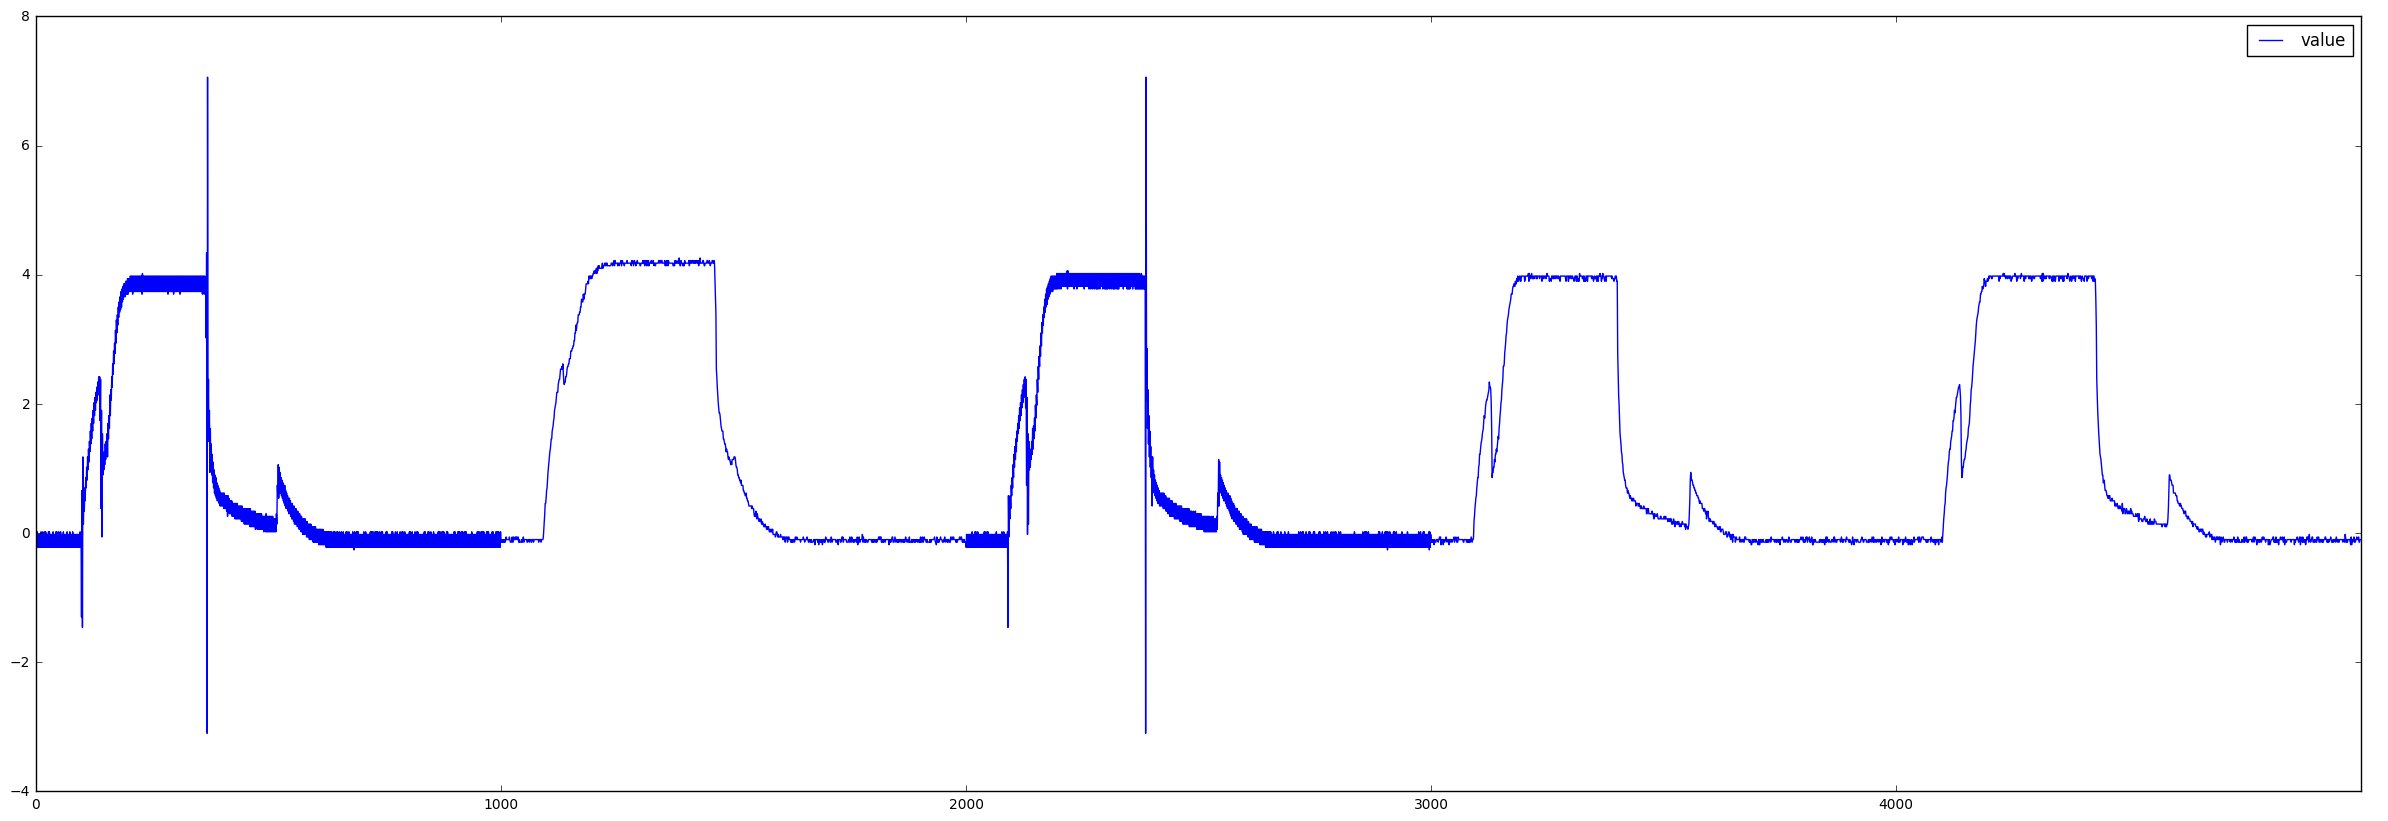

In [3]:
df1.plot(figsize=(30,10))
plt.show()

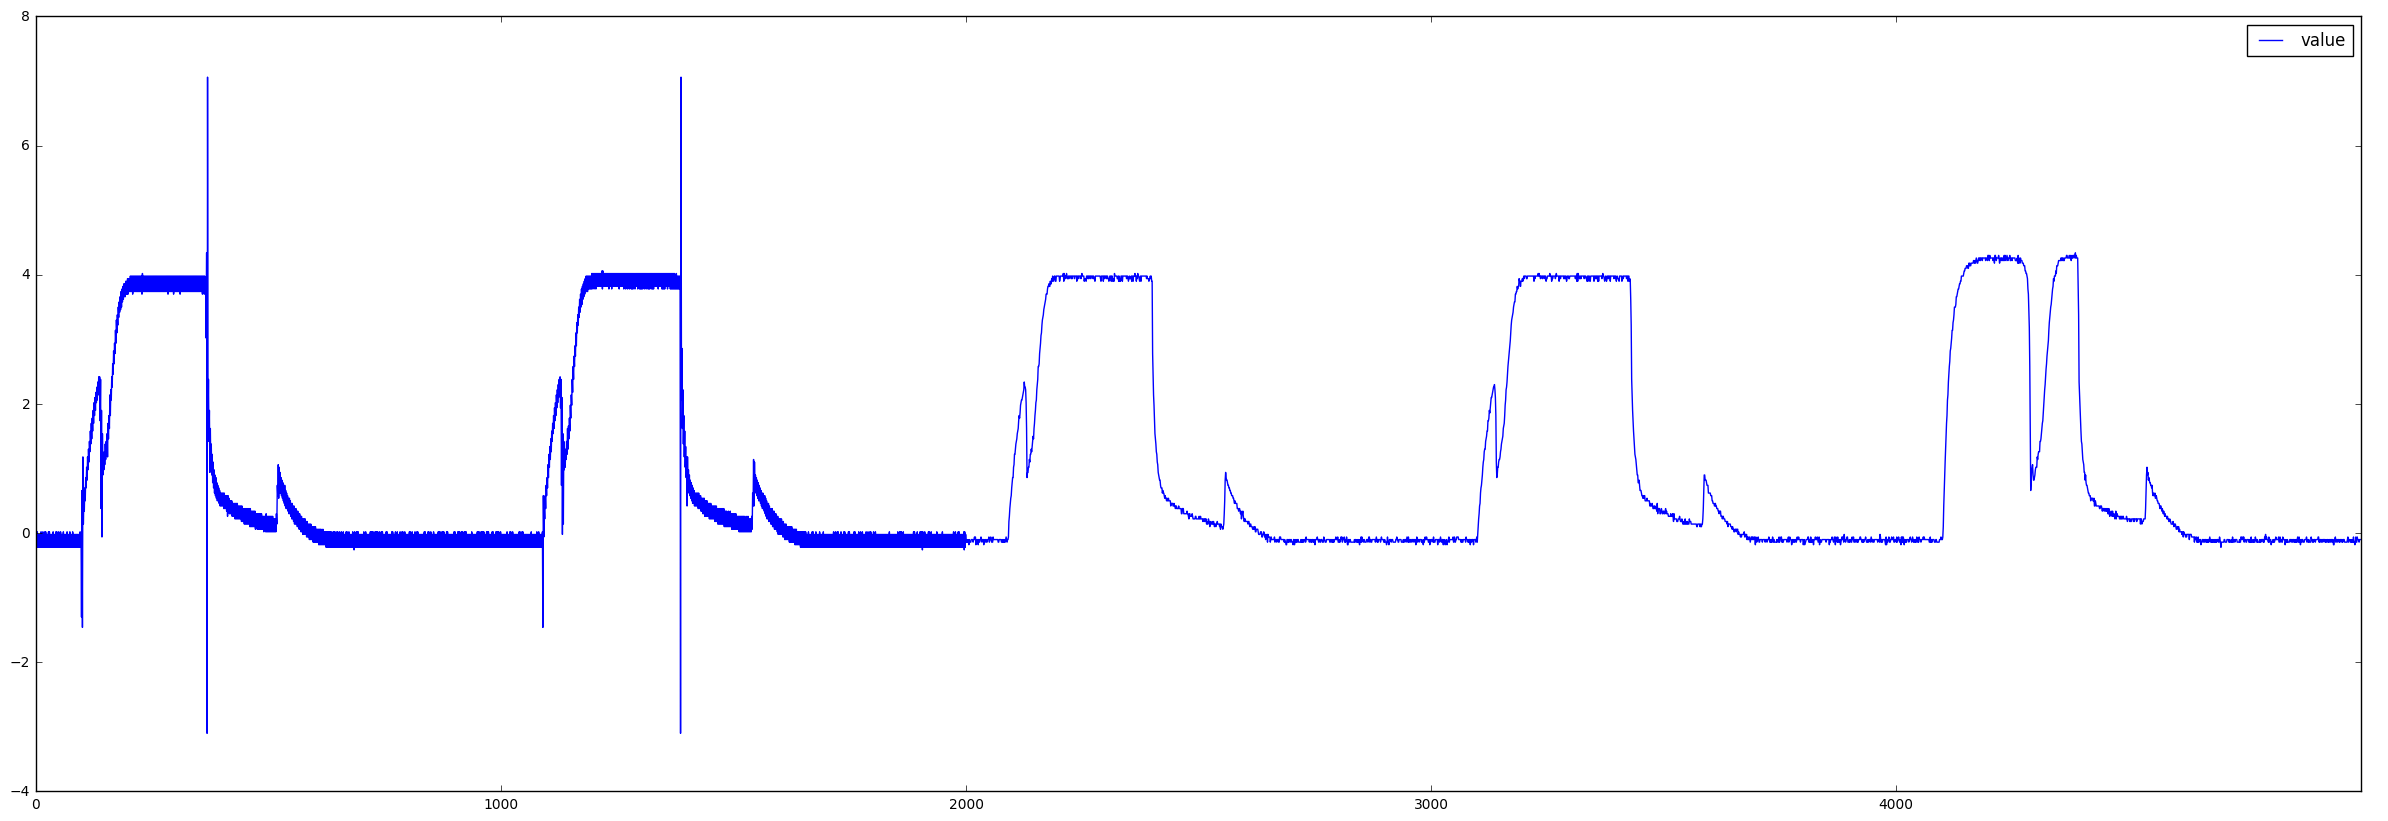

In [4]:
df2.plot(figsize=(30,10))
plt.show()

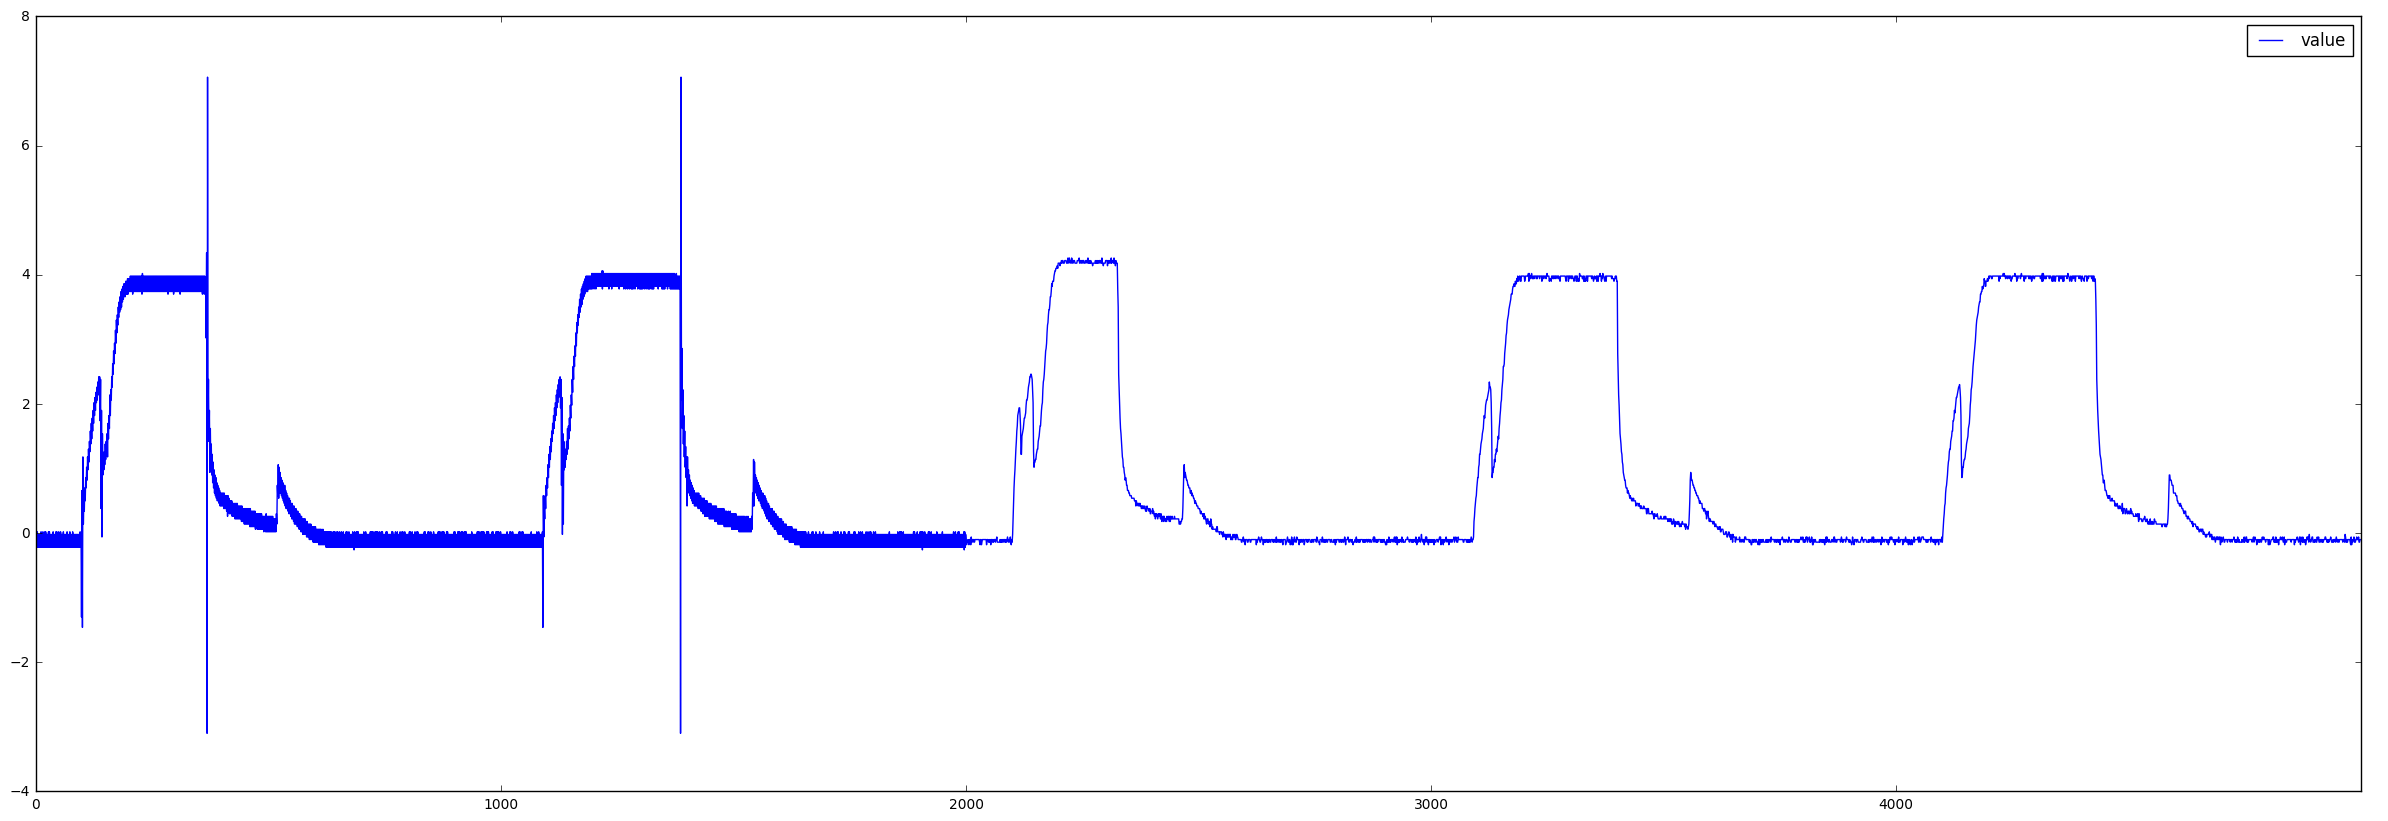

In [5]:
df3.plot(figsize=(30,10))
plt.show()

In [6]:
df.count()

value    15000
dtype: int64

In [7]:
df.tail()

,value
14995,-0.14
14996,-0.14
14997,-0.10
14998,-0.10
14999,-0.10


In [8]:
num_values = "num_values: %s"%(df.shape[0])
print num_values

num_values: 15000


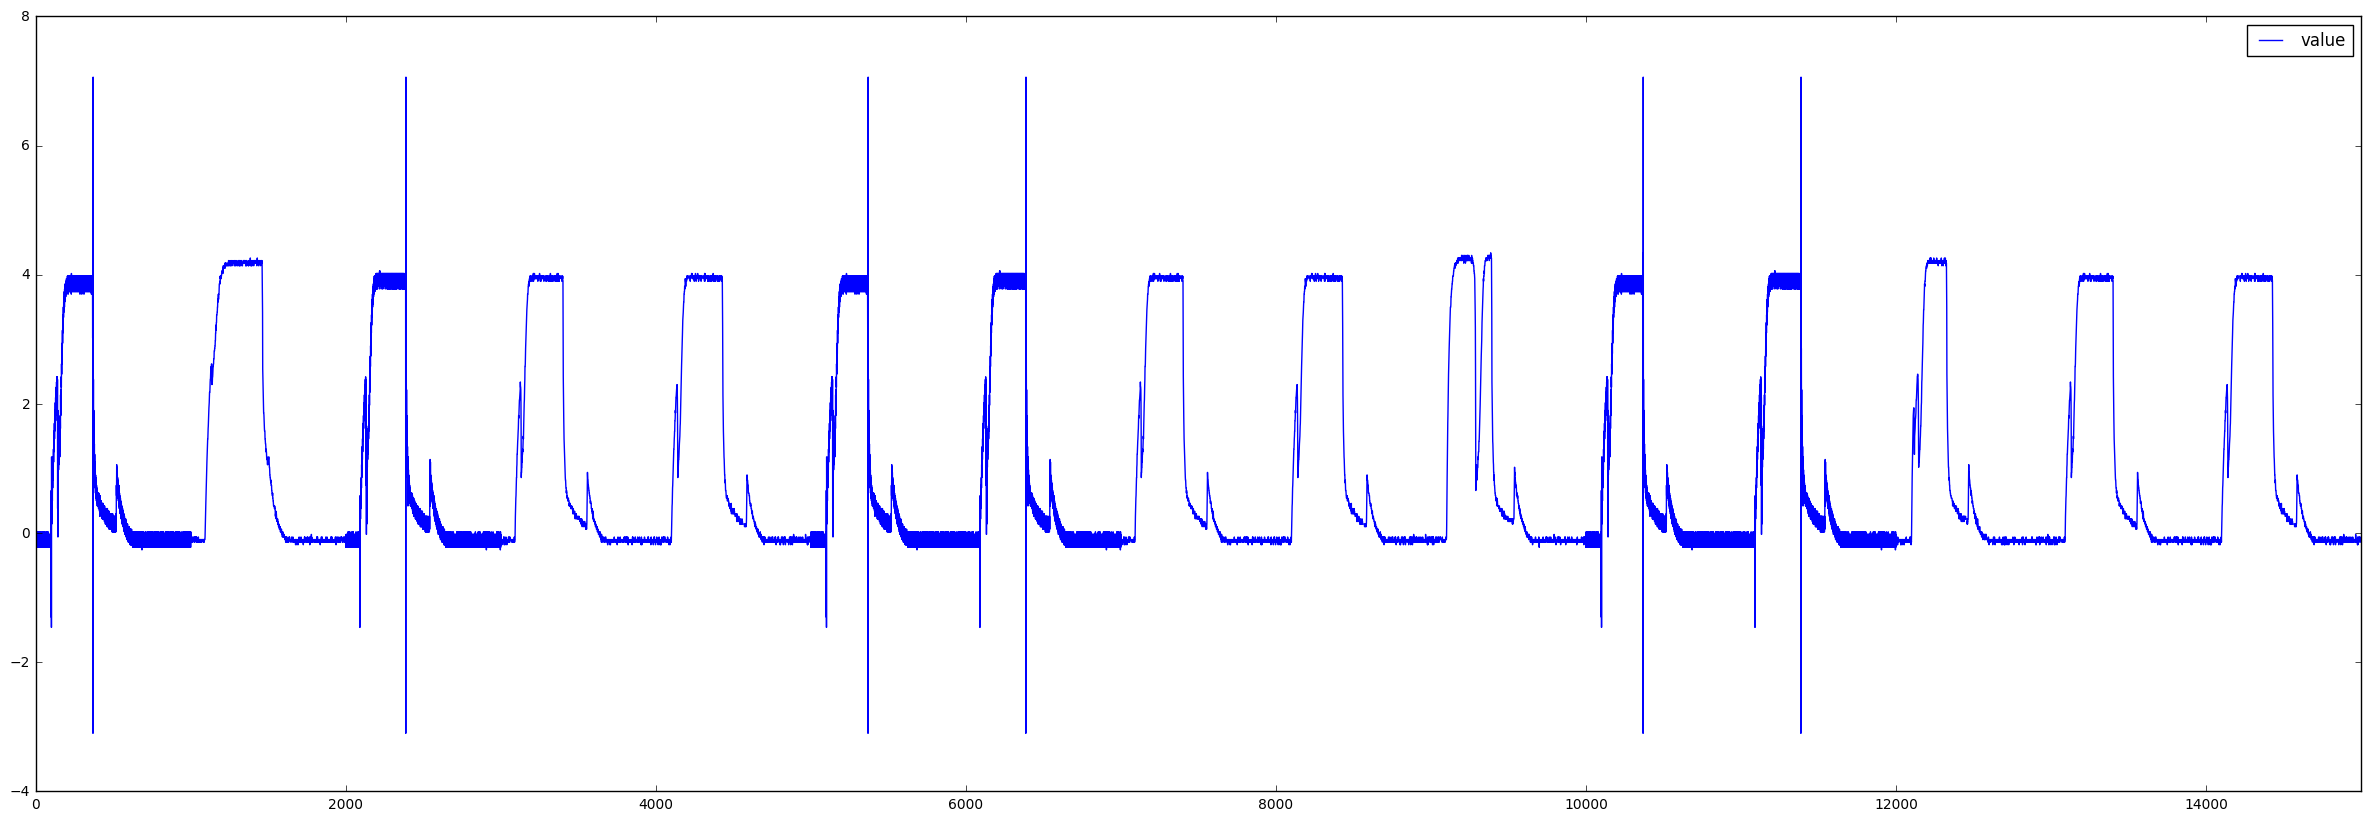

In [9]:
df.plot(figsize=(30,10))
plt.show()

In [10]:
df['anomaly'] = 0
df.head()

,value,anomaly
0,-0.22,0
1,0.02,0
2,-0.22,0
3,0.02,0
4,-0.22,0


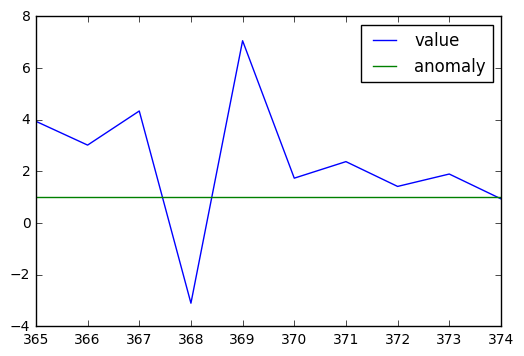

In [33]:
df[365:375].plot()
plt.show()

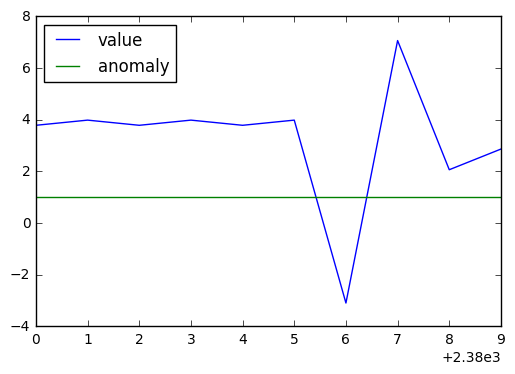

In [44]:
df[2380:2390].plot()
plt.show()

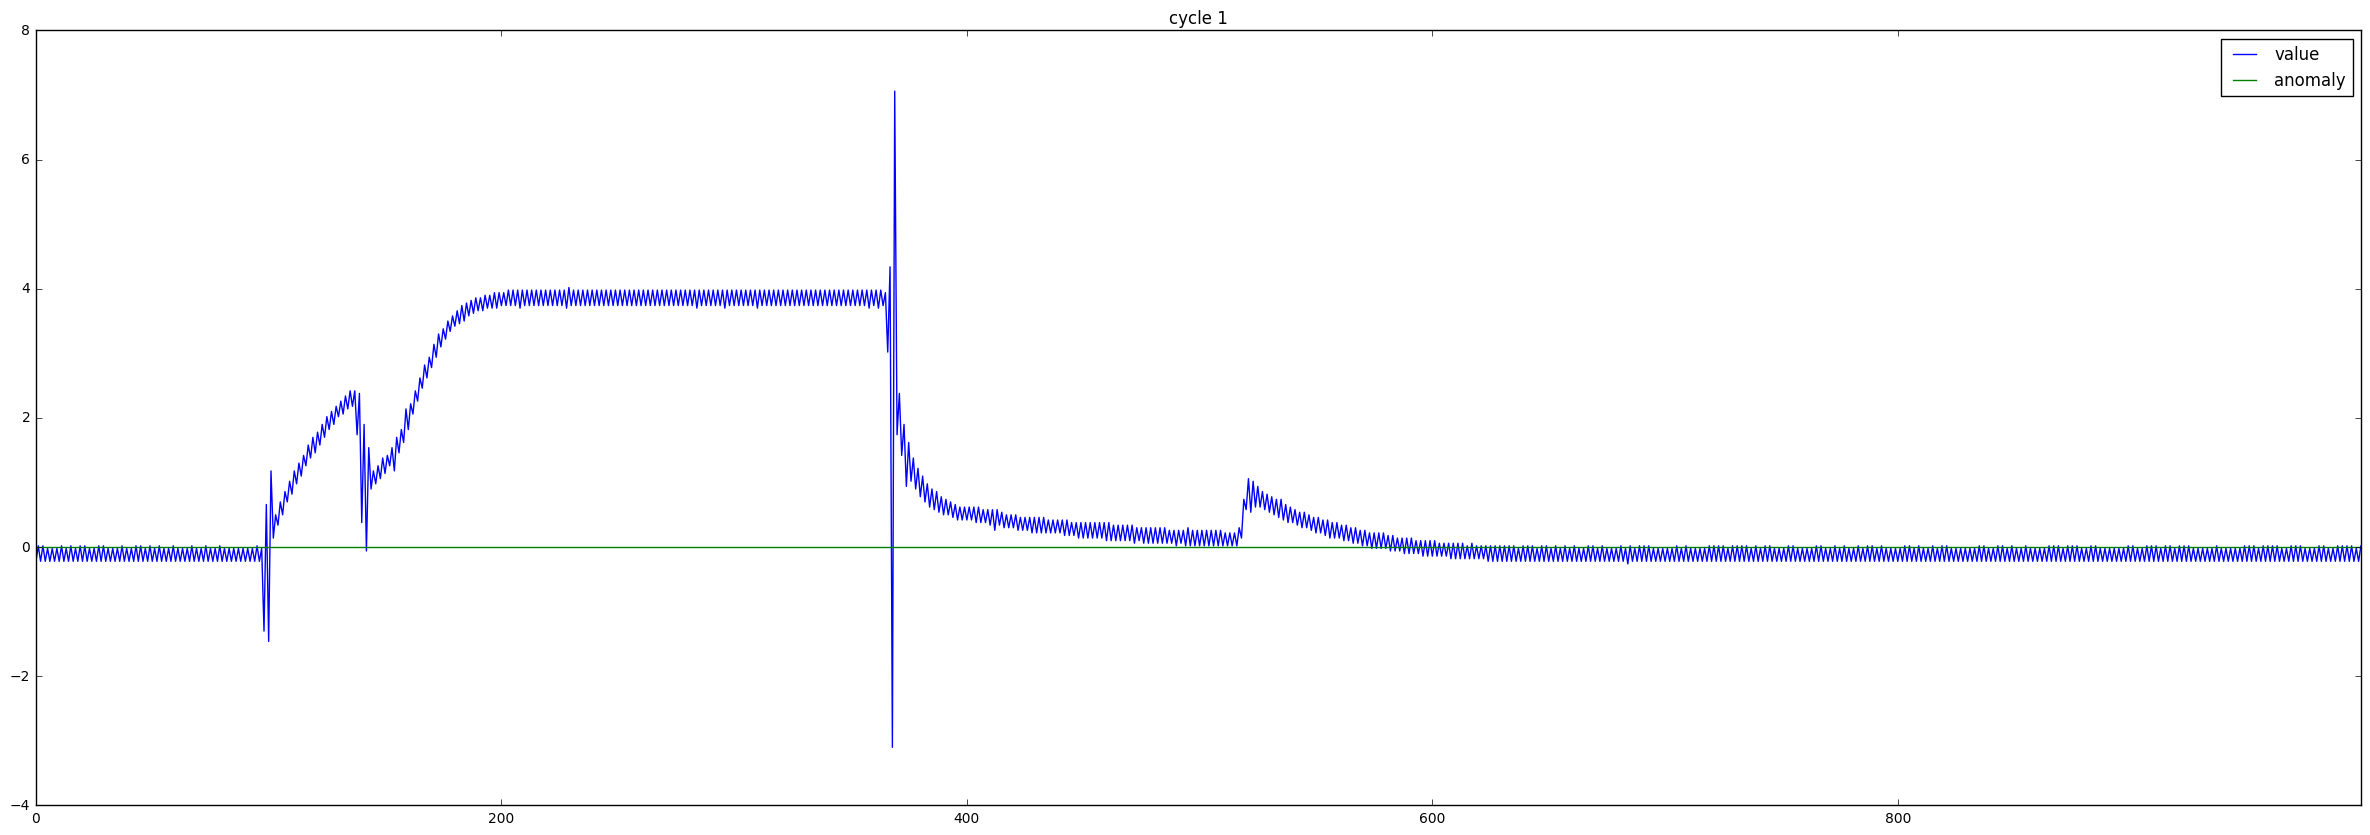

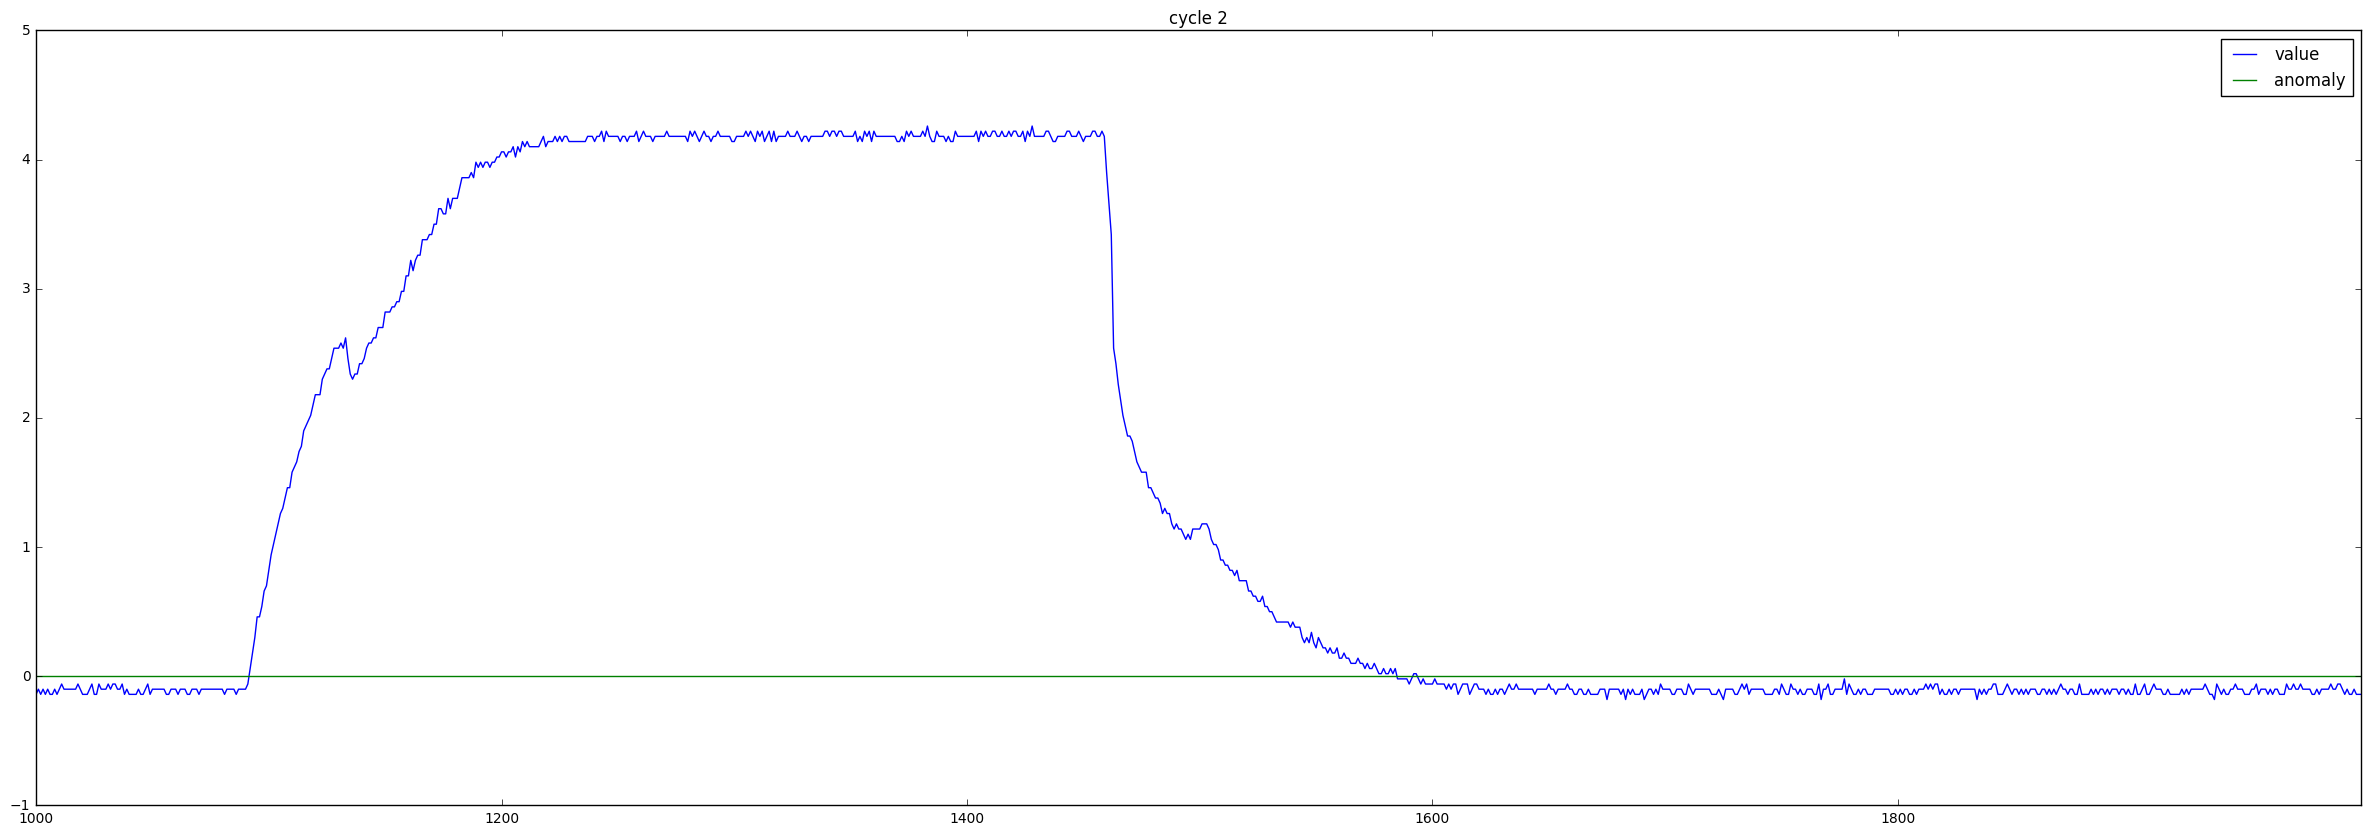

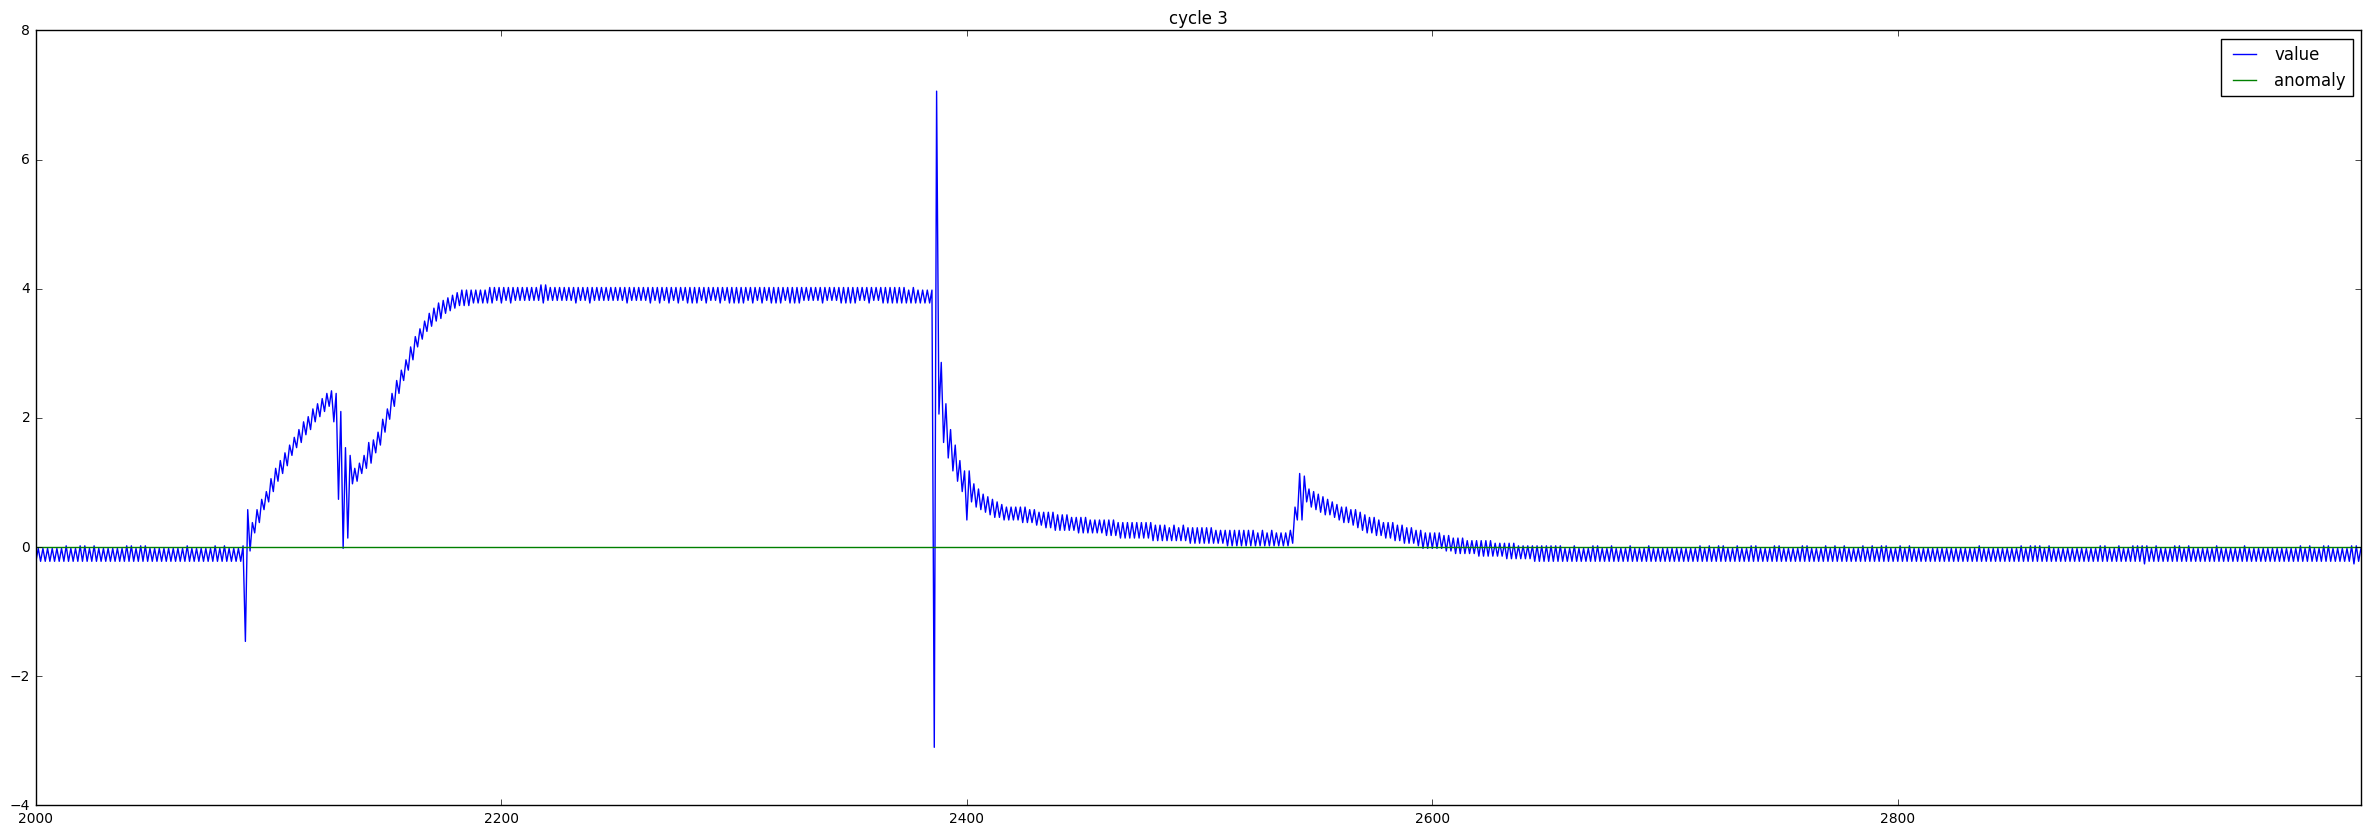

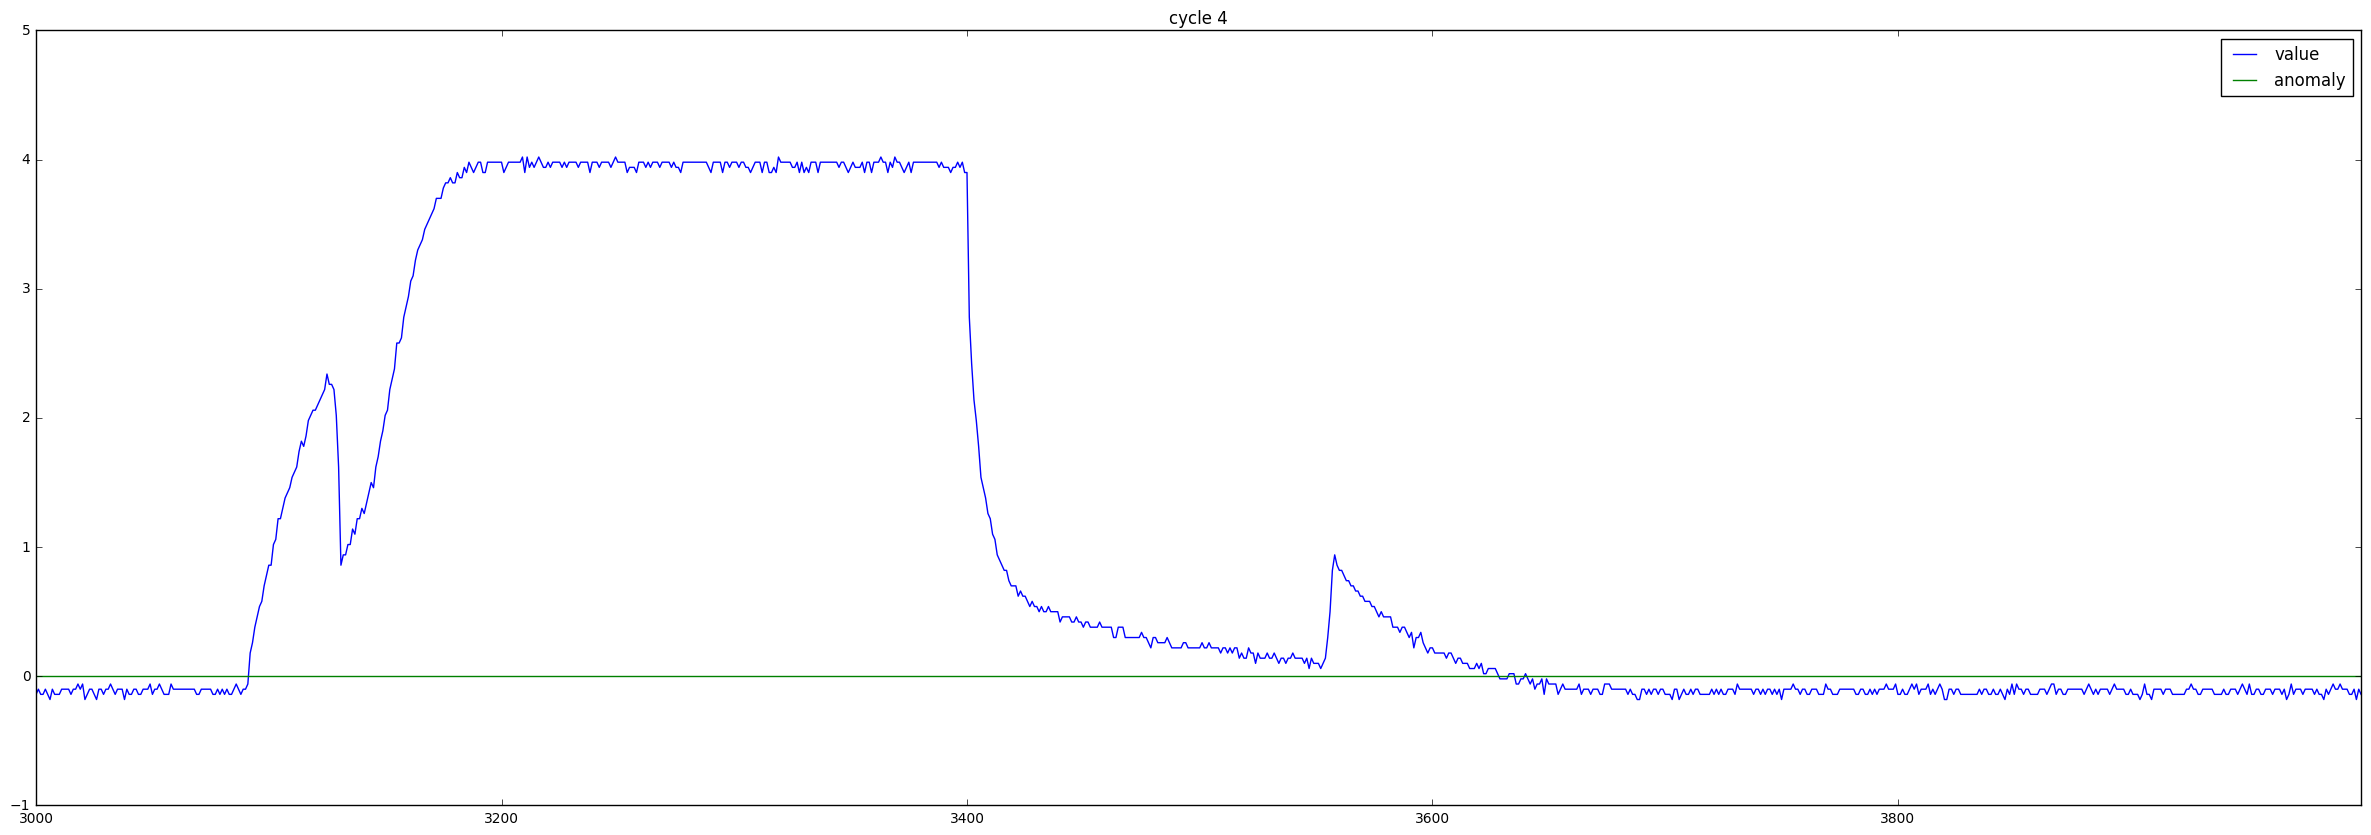

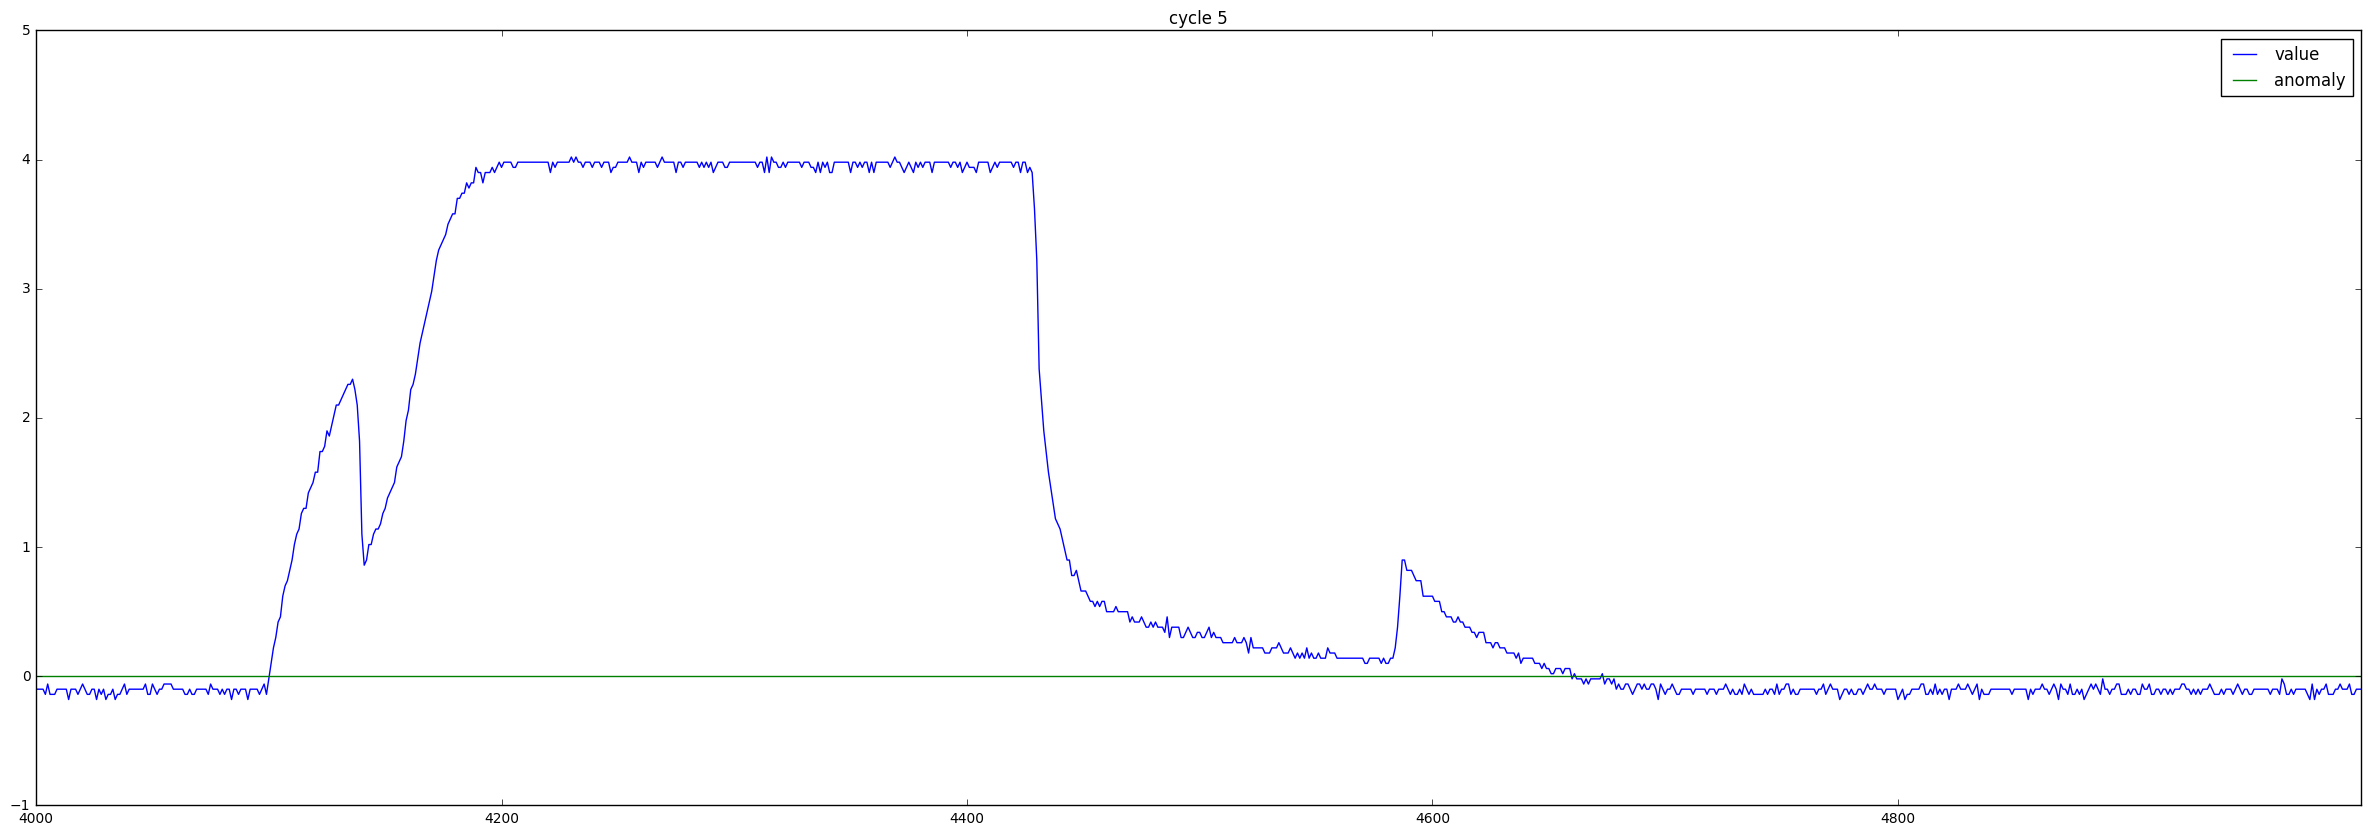

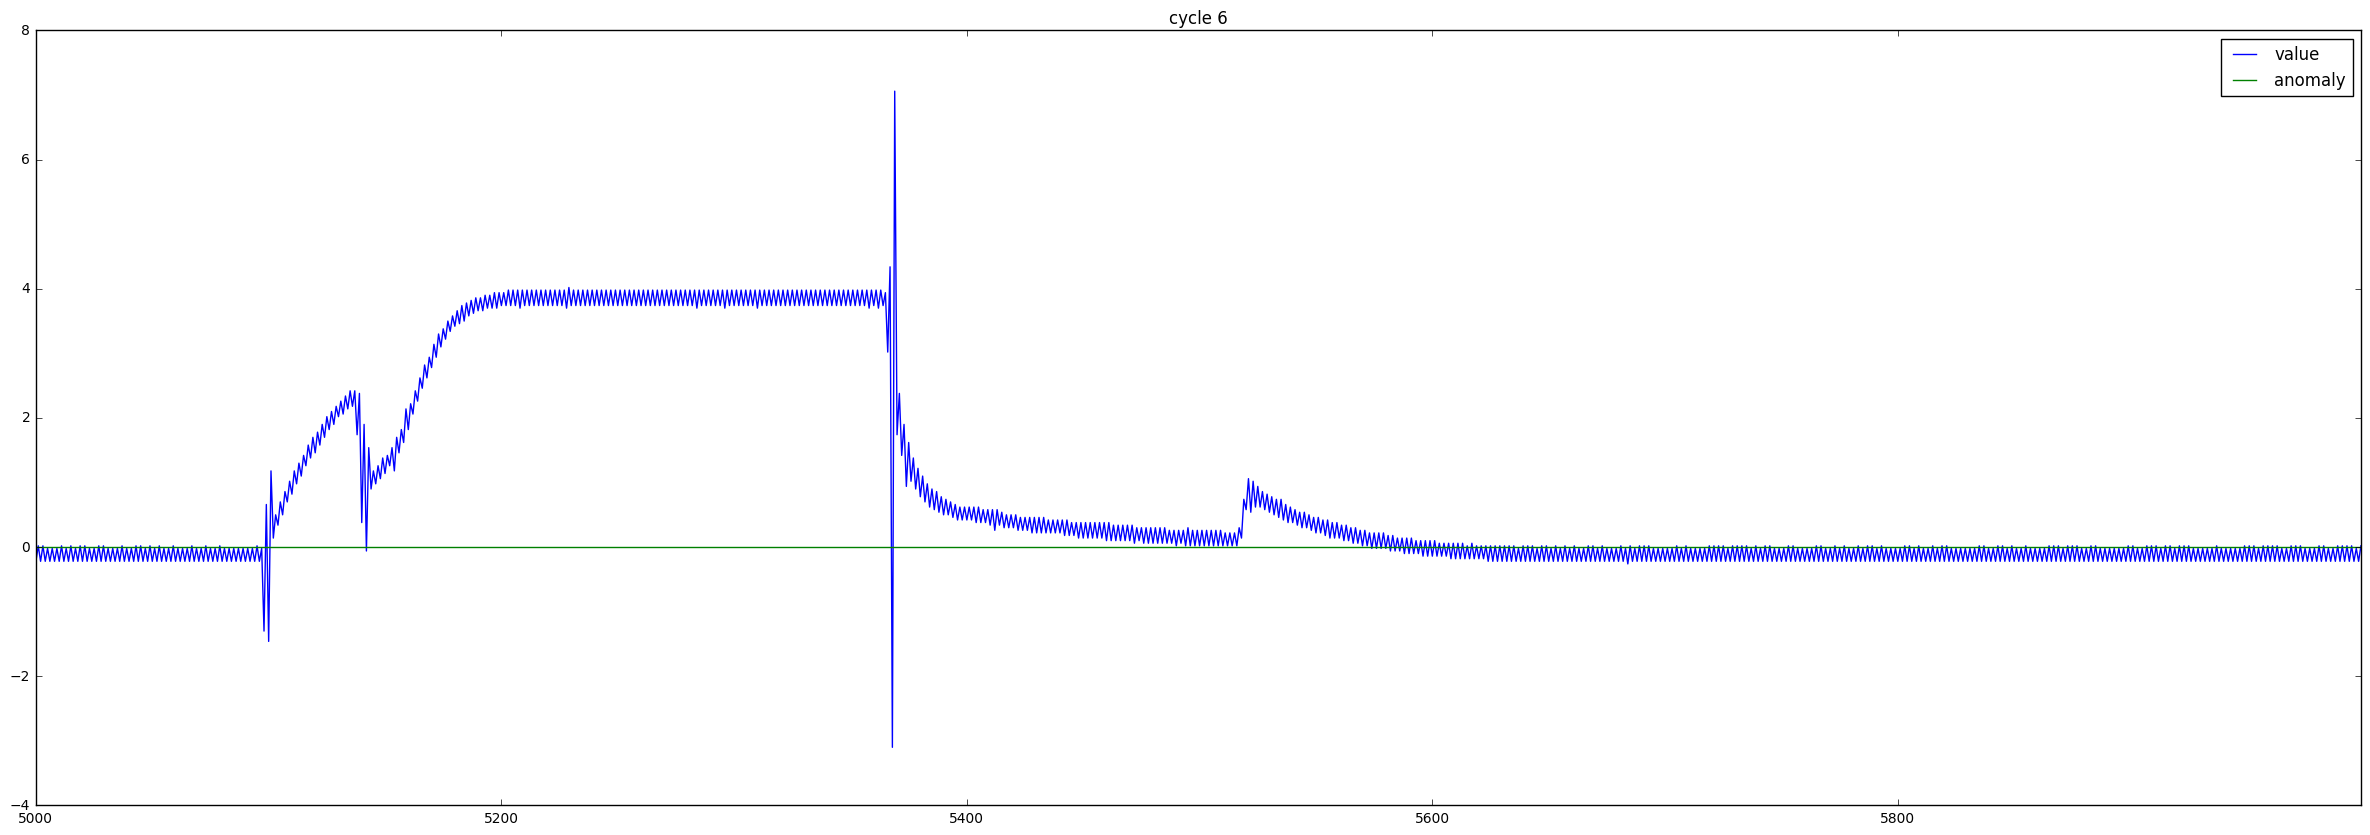

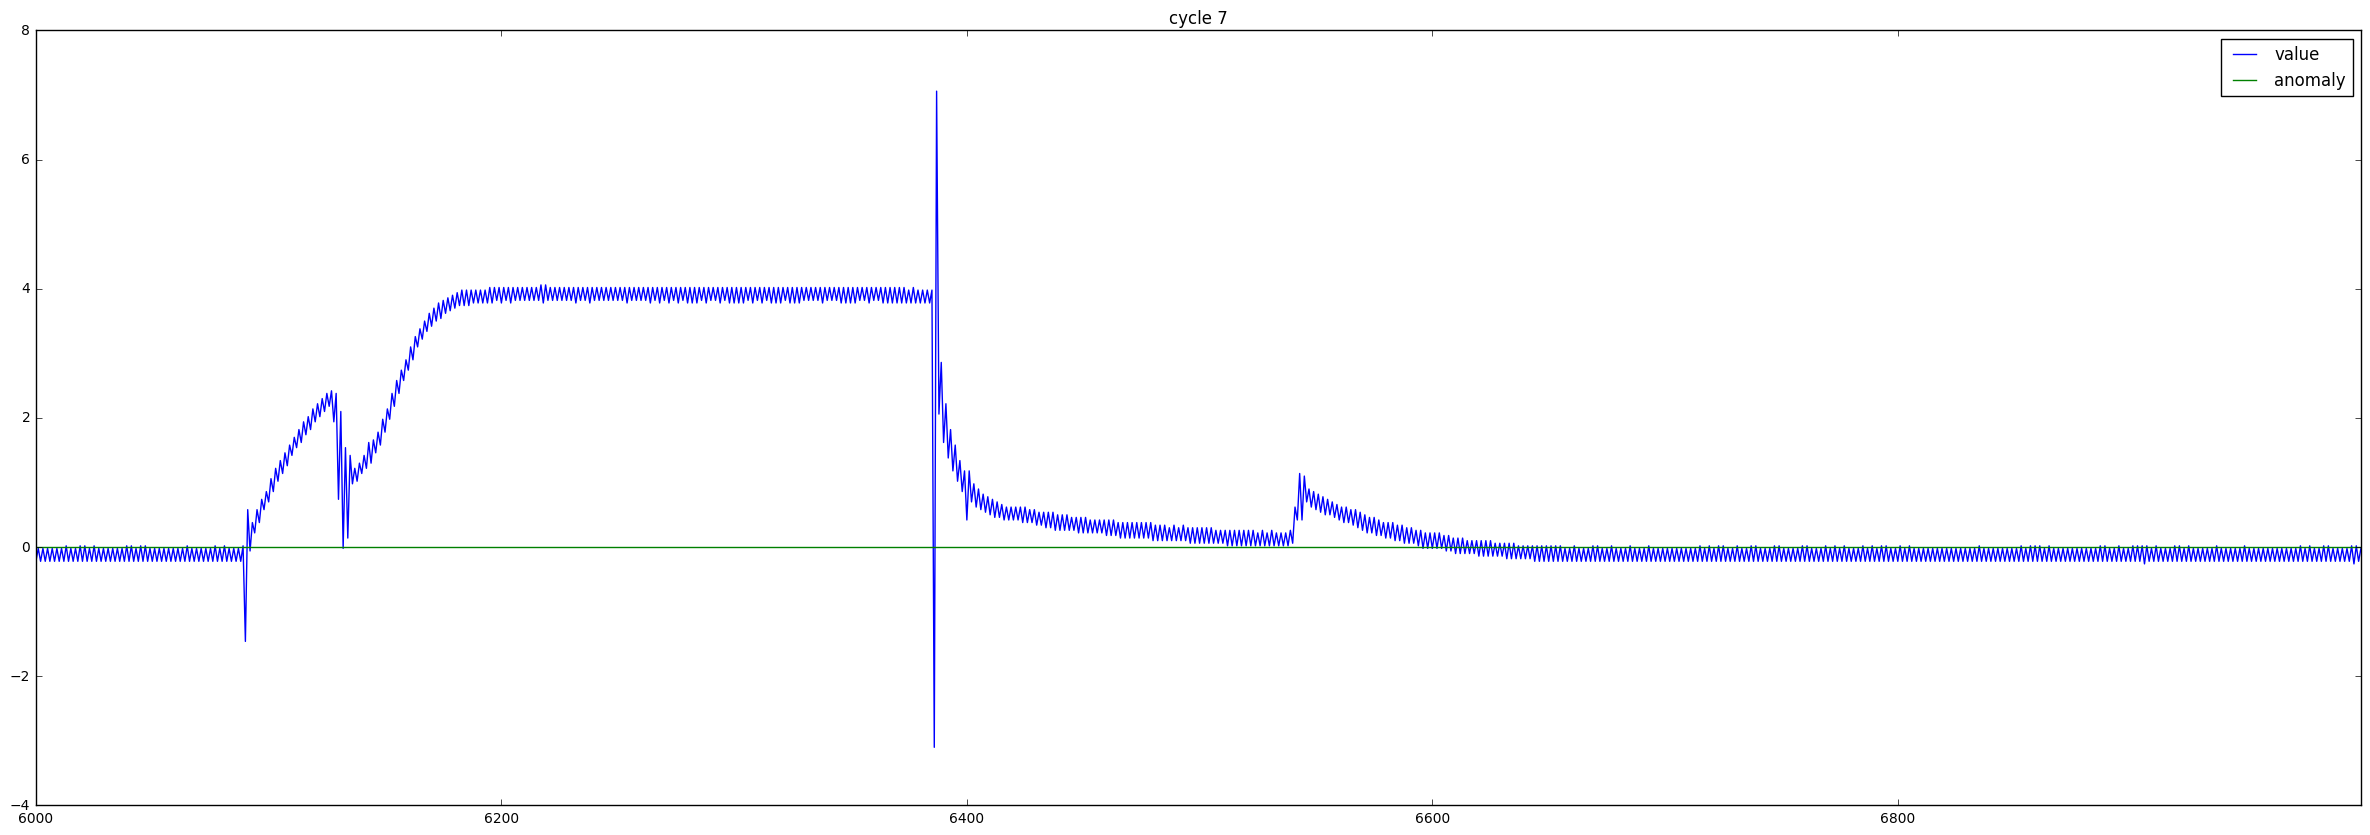

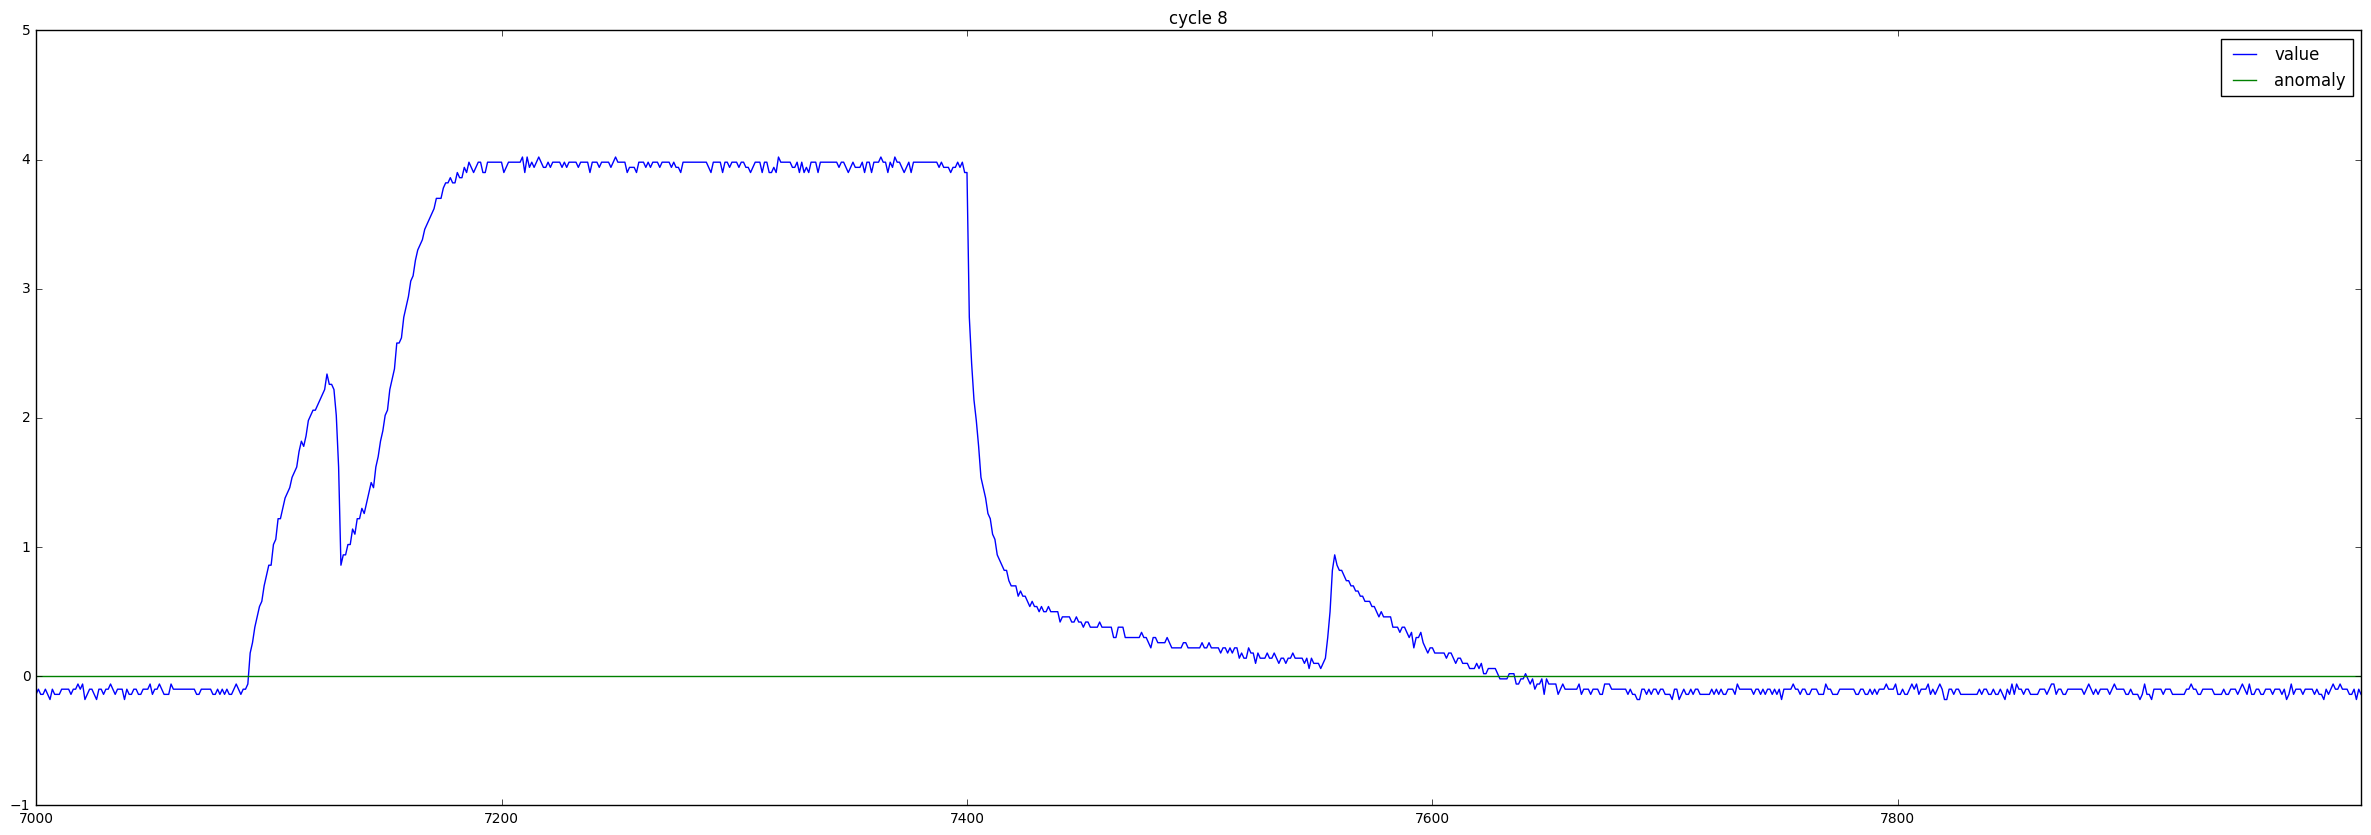

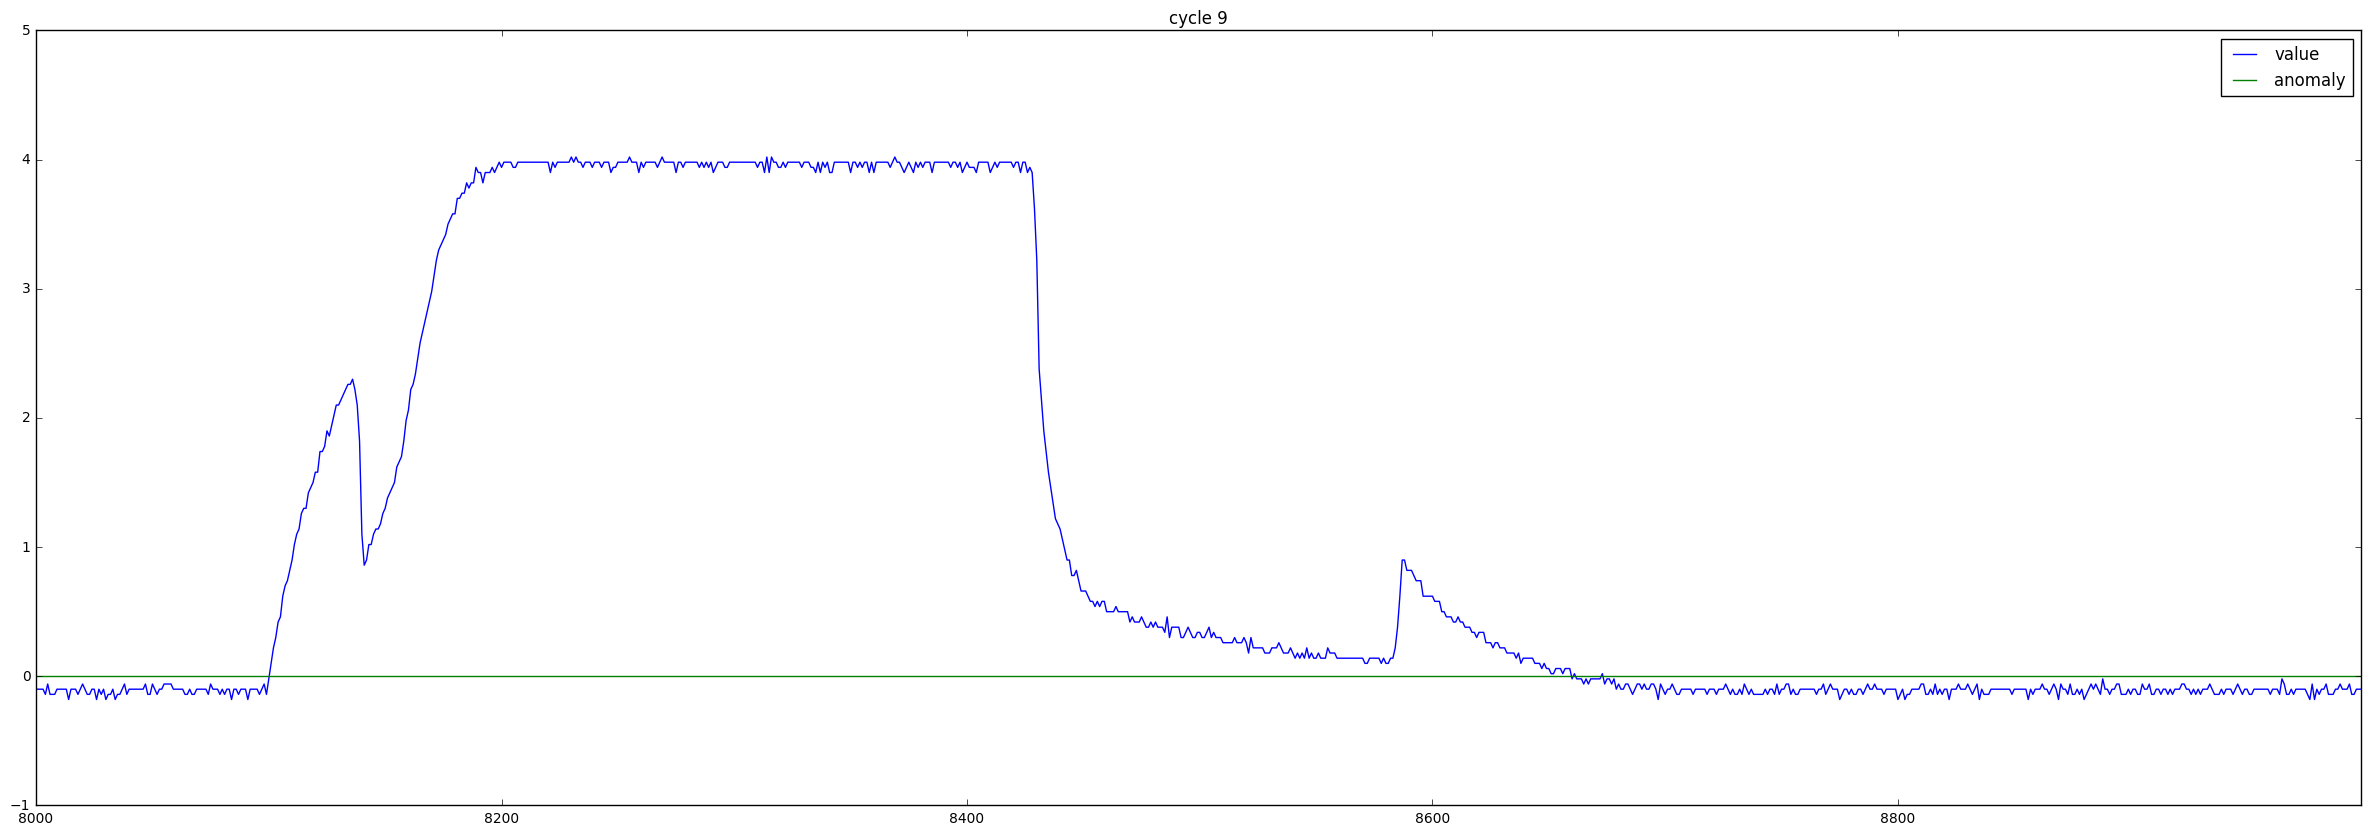

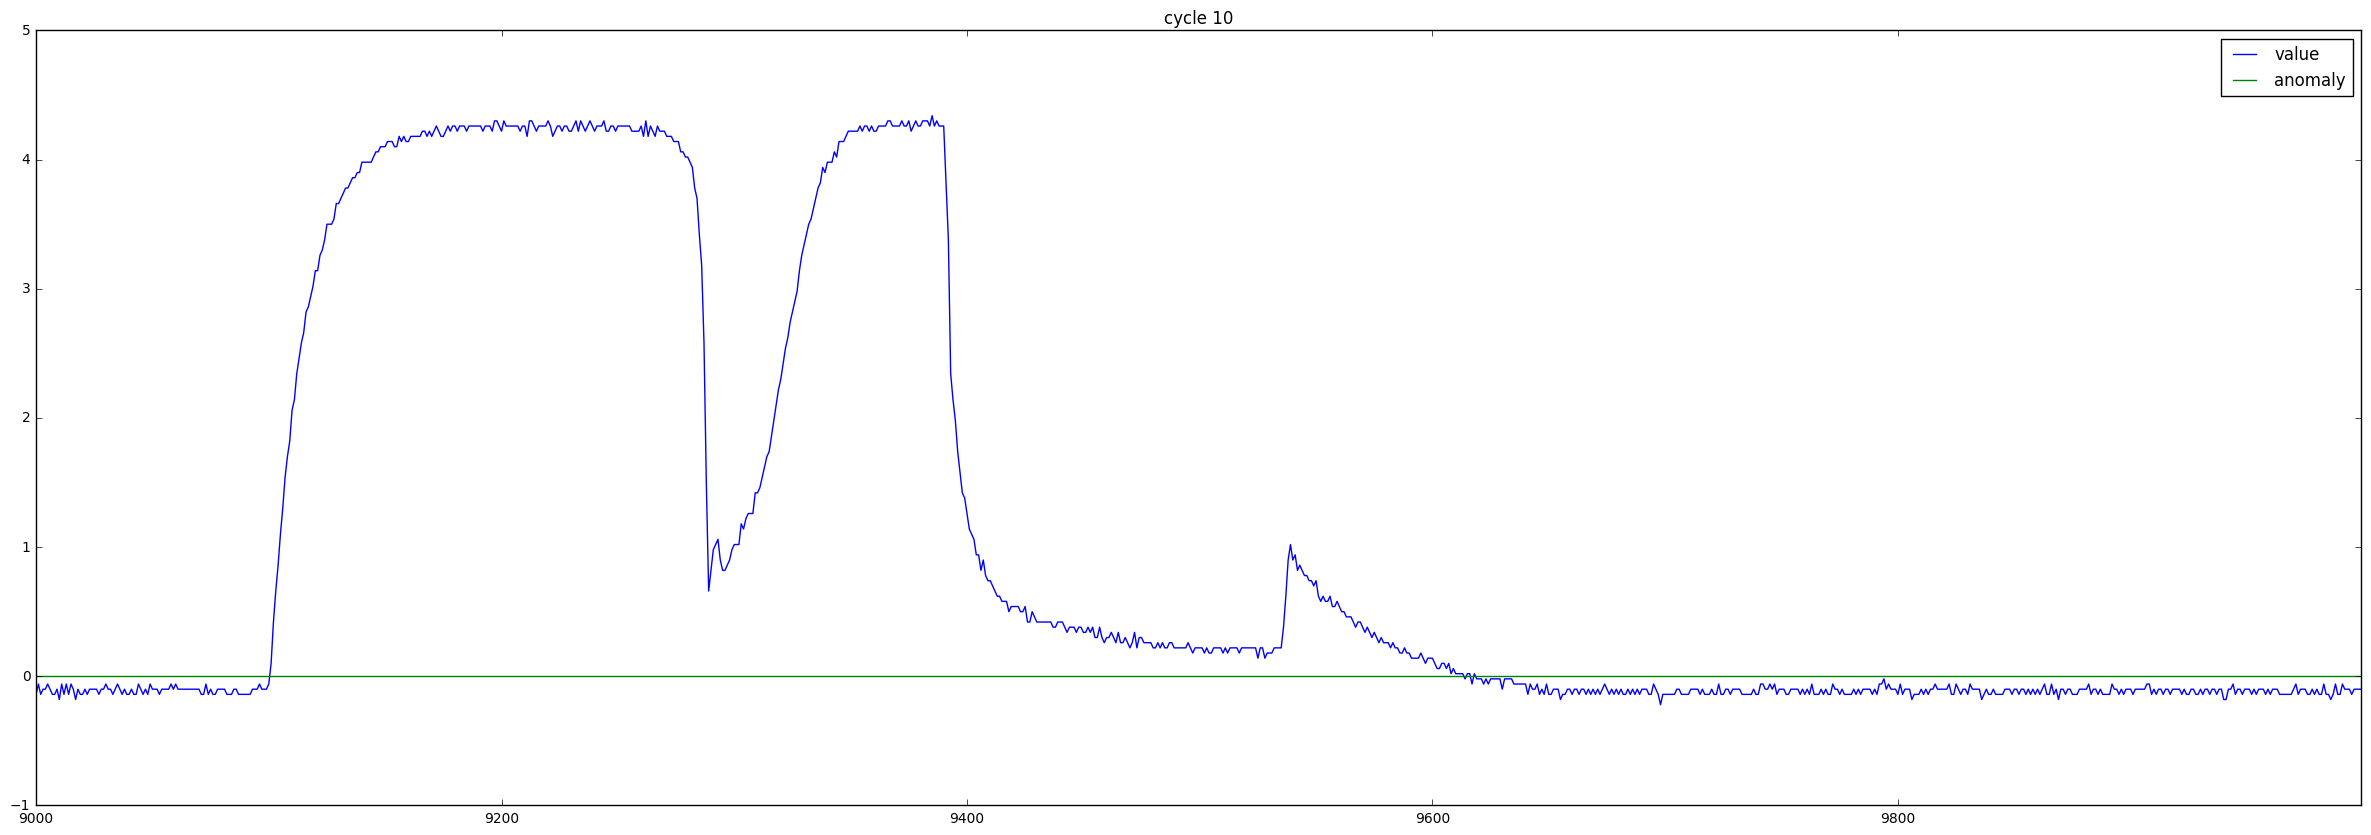

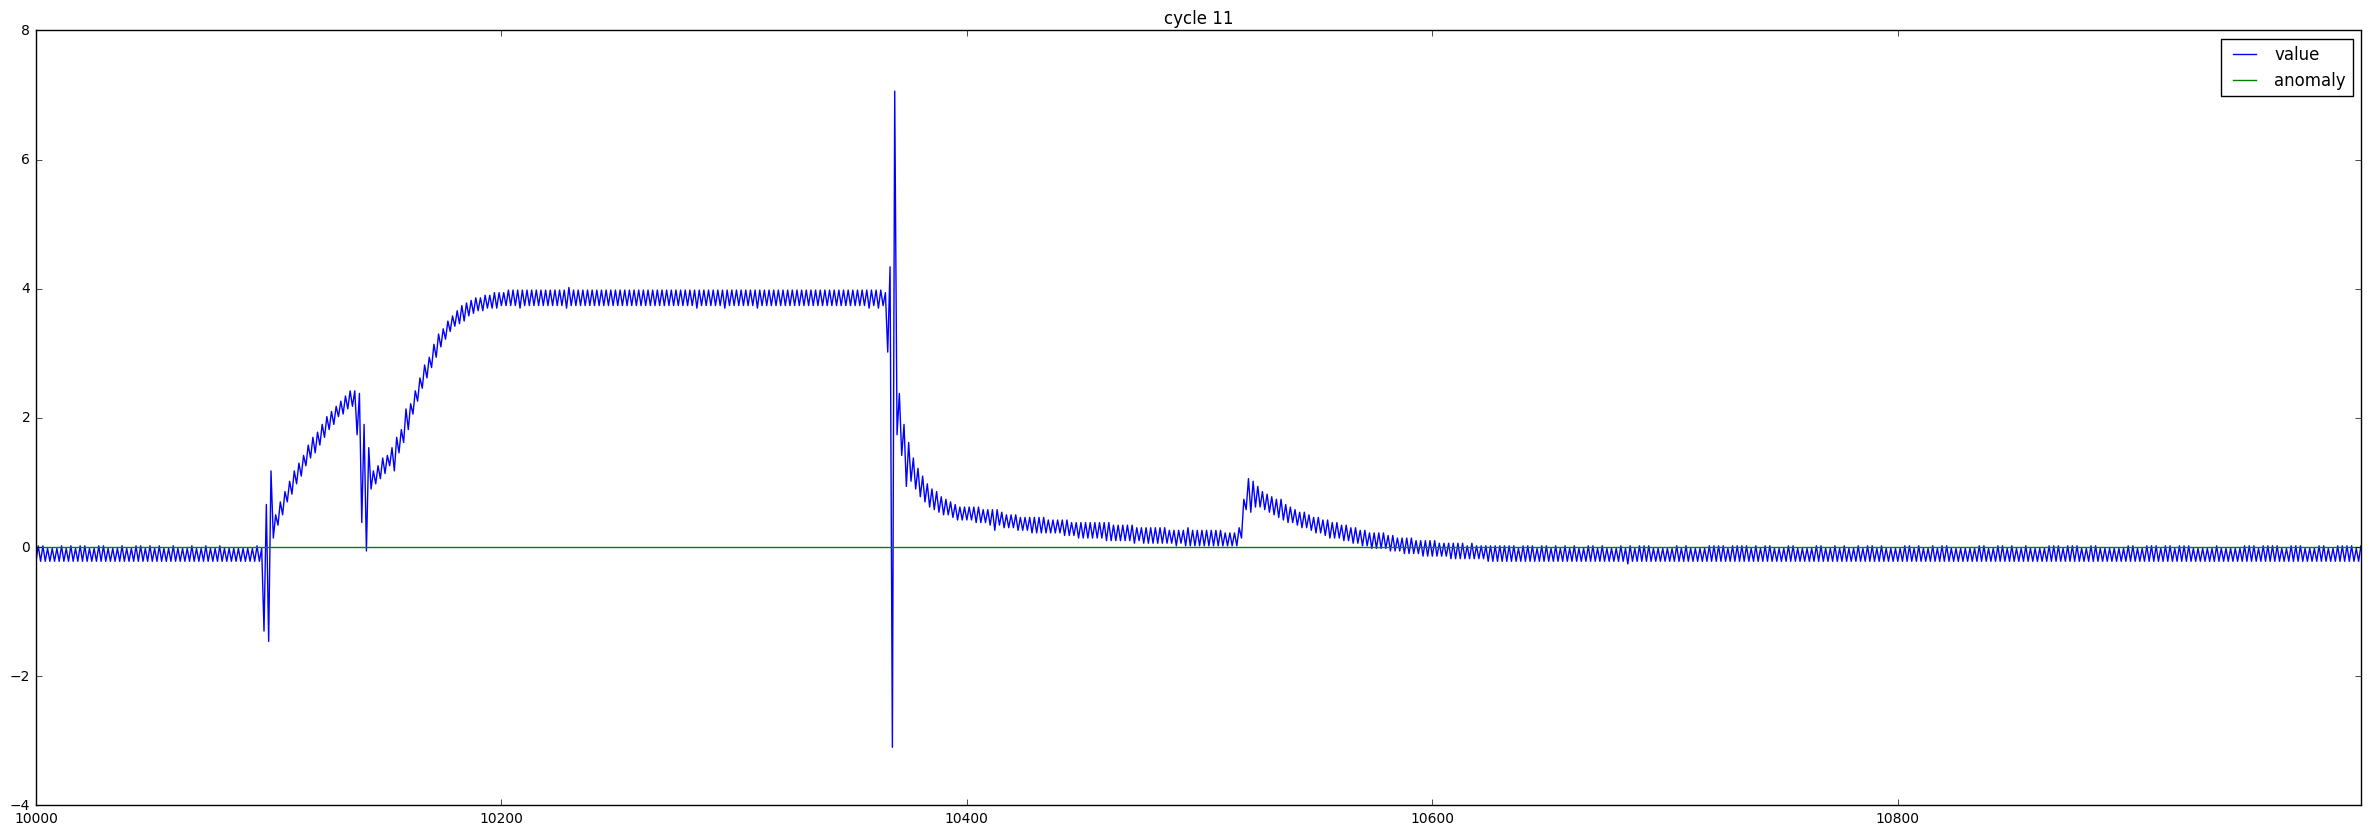

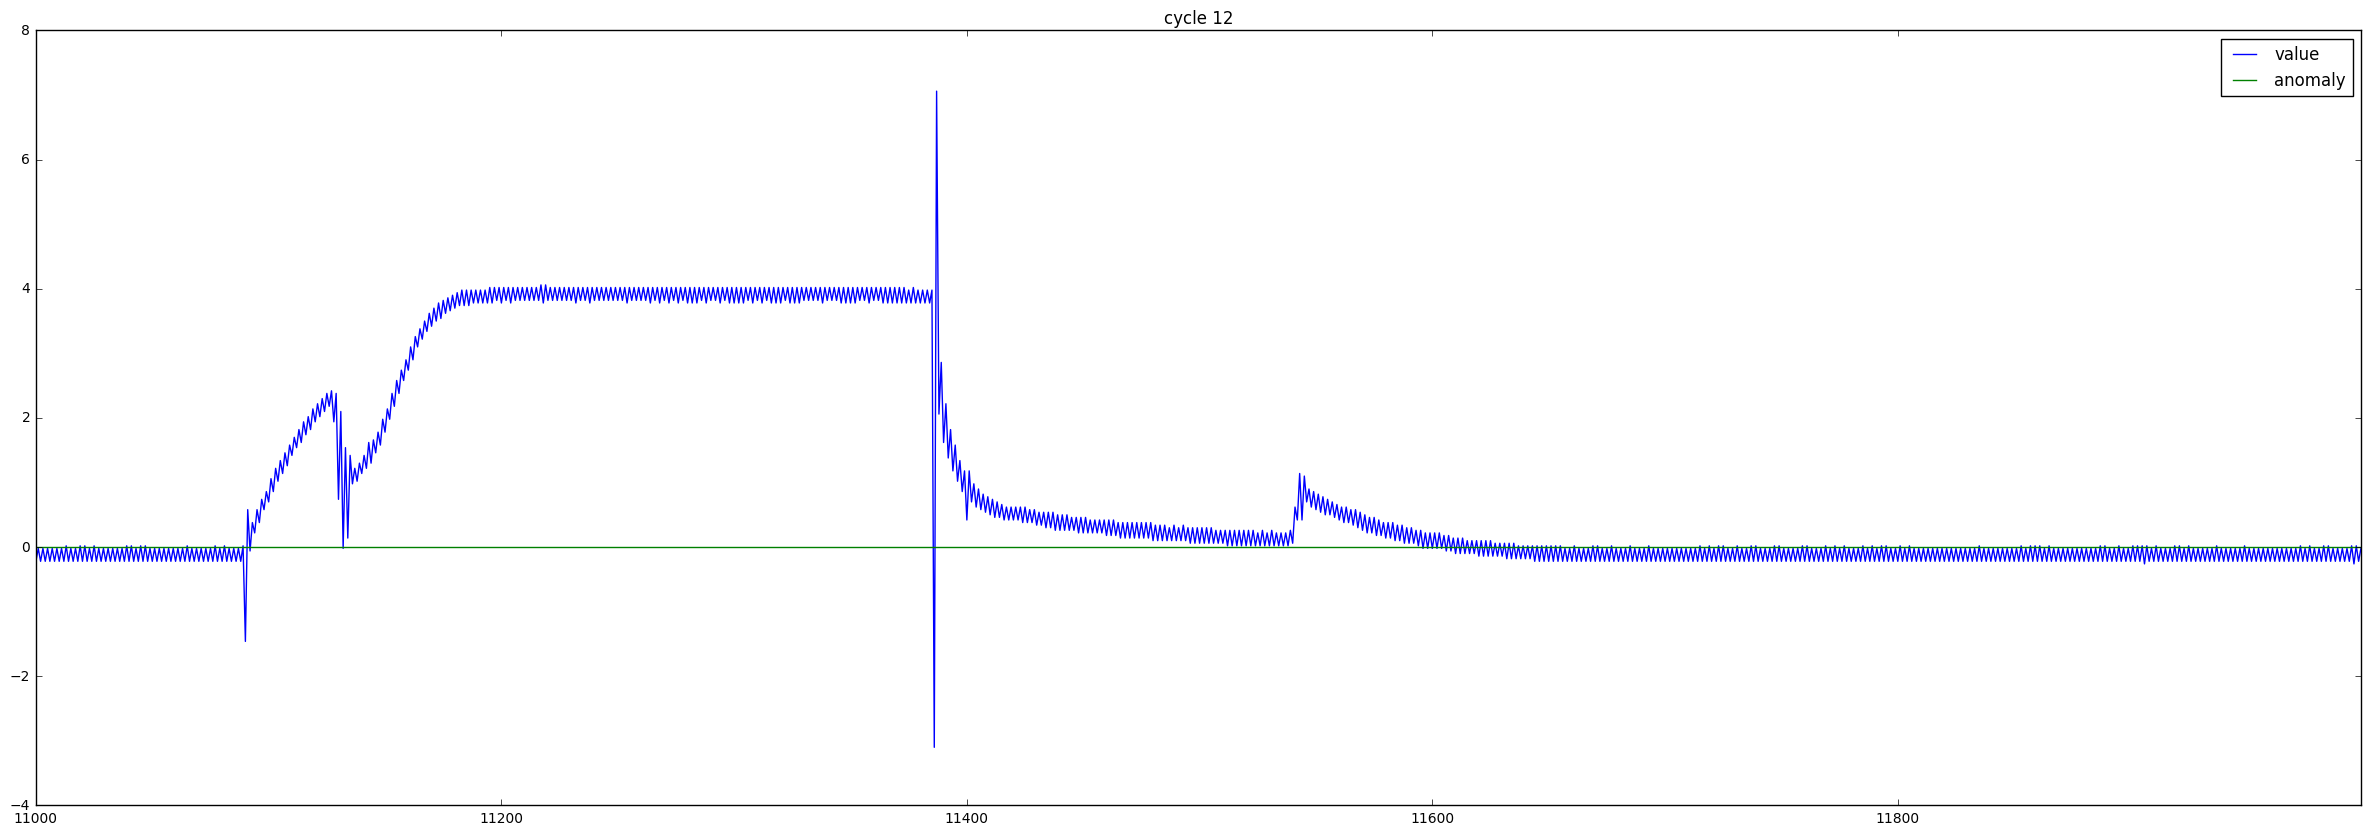

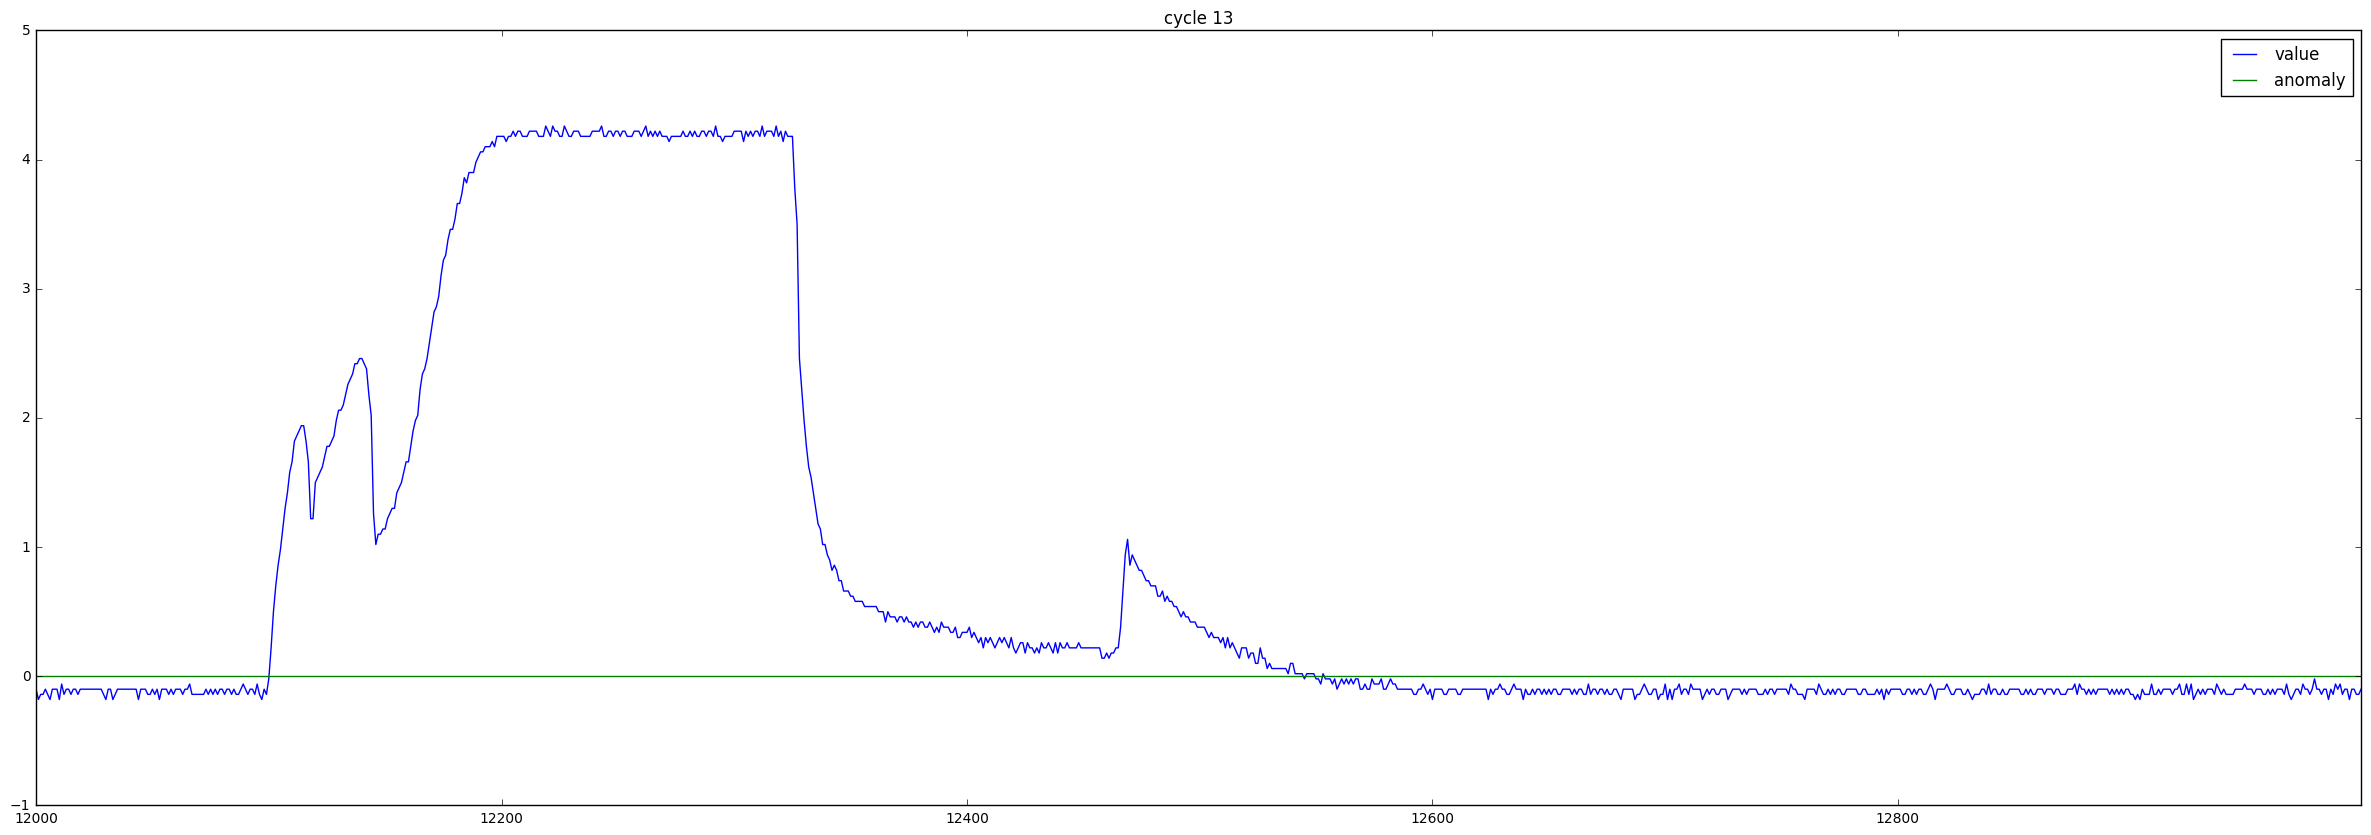

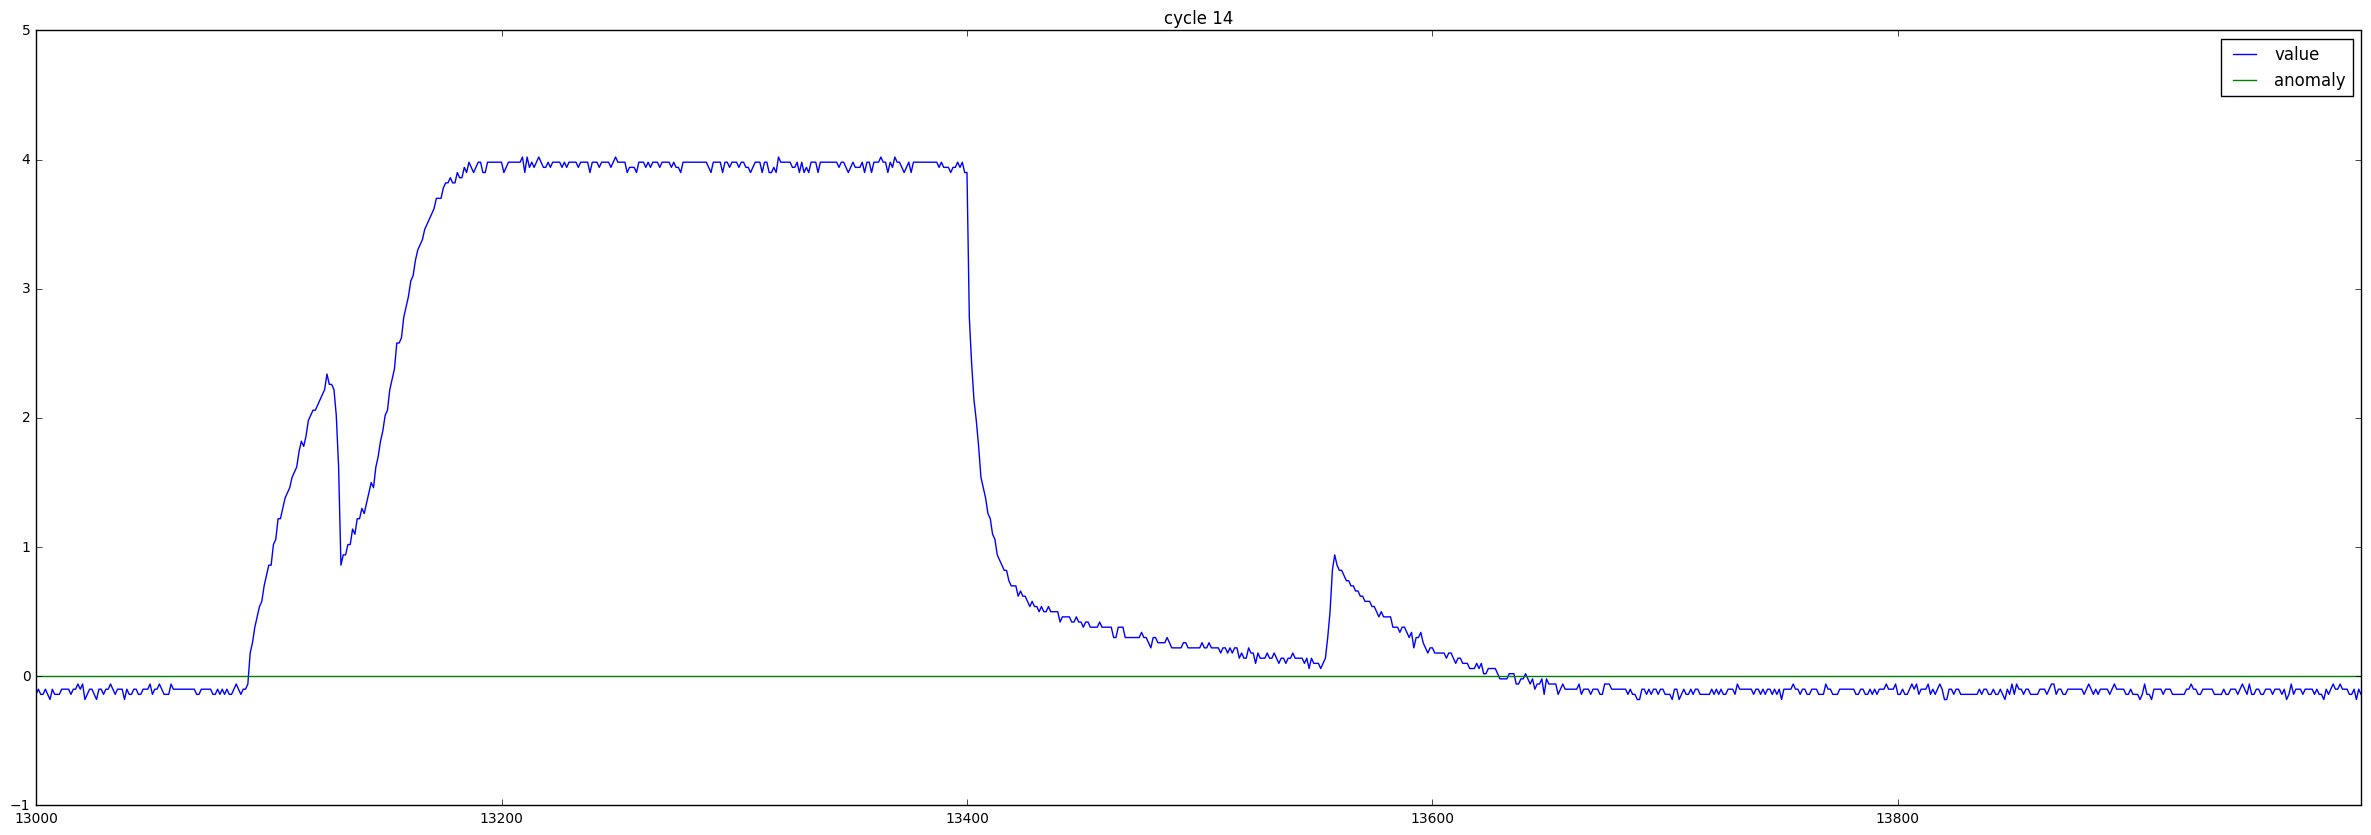

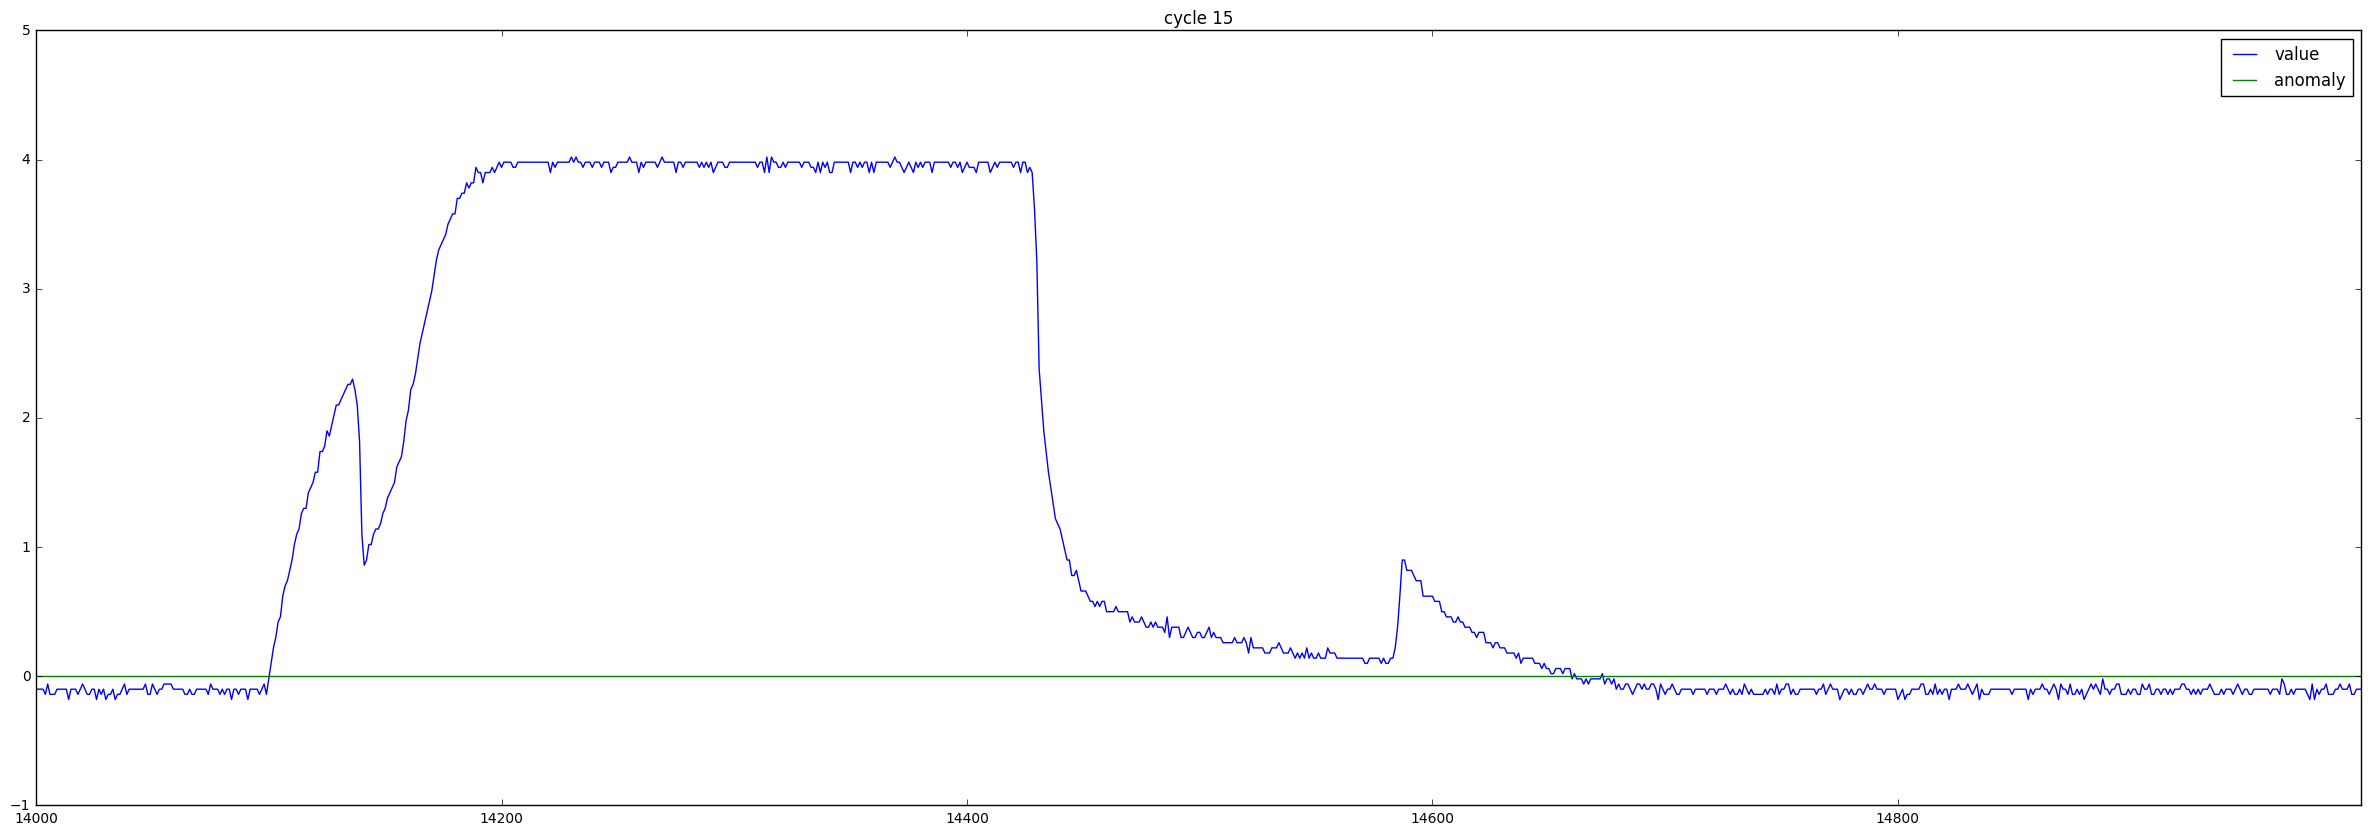

In [11]:
#iterate over a week. a week will have 672 values
step = 1000
for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    plt.title("cycle %s"%(i/step +1))
    plt.show()
    

In [89]:
EXTREME_VALUE_CYCLES = [1,3,6,7,11,12]
anomaly_cycles = [2,10,13]
validation2_cycles = [4,2,5,10,13]
test_cycles = [4,2,5,10,13]
train_cycles = [8,9,14,15]
validation1_cycles = [14]
df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []
step = 1000
for i in range(0,df.shape[0],step):
    cycle = i/step +1
    if cycle in train_cycles:
        df_train_list.append(df[i:i+step])
        
    if cycle in validation1_cycles:
        df_valid1_list.append(df[i:i+step])
        
    if cycle in validation2_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
        
    if cycle in test_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])

print len(df_train_list)
print len(df_valid1_list)
print len(df_valid2_list)
print len(df_test_list)
   

4
1
5
5


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

In [91]:
df_dict['test'].head()

,value,anomaly
1000,-0.14,1
1001,-0.10,1
1002,-0.14,1
1003,-0.10,1
1004,-0.14,1


In [92]:
# plt.figure()
# df['value'].plot(figsize=(15,5))
# rows = df[df.anomaly.isin([1])].itertuples()
# for row in rows:
#     plt.plot(row[0], row[1], 'r.', markersize=5.0)
# plt.show()

Size of test: 5000
Size of validation1: 1000
Size of validation2: 5000
Size of train: 4000
Total: 15000
Ratio of test: 0.333333
Ratio of validation1: 0.066667
Ratio of validation2: 0.333333
Ratio of train: 0.266667


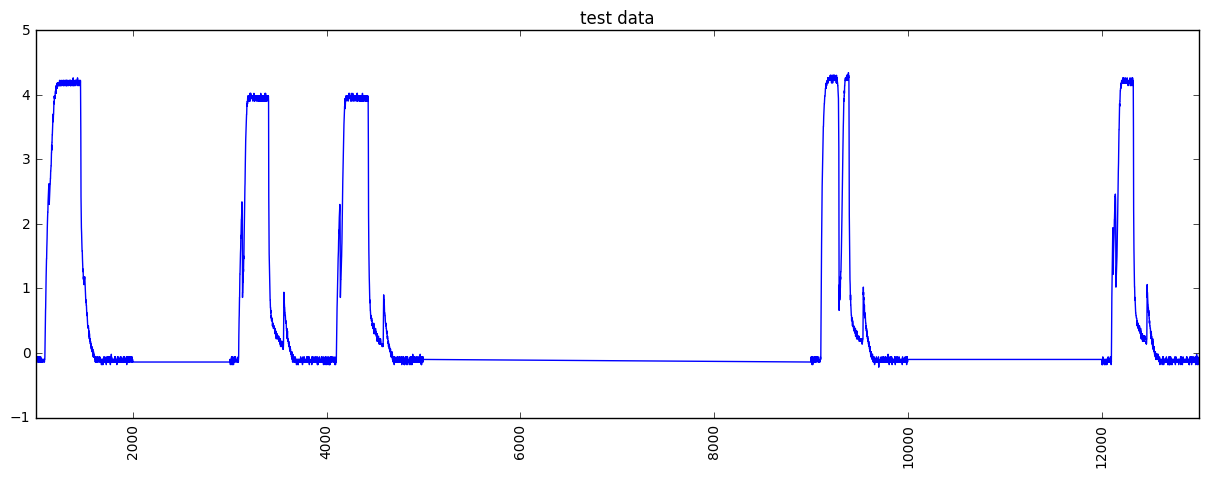

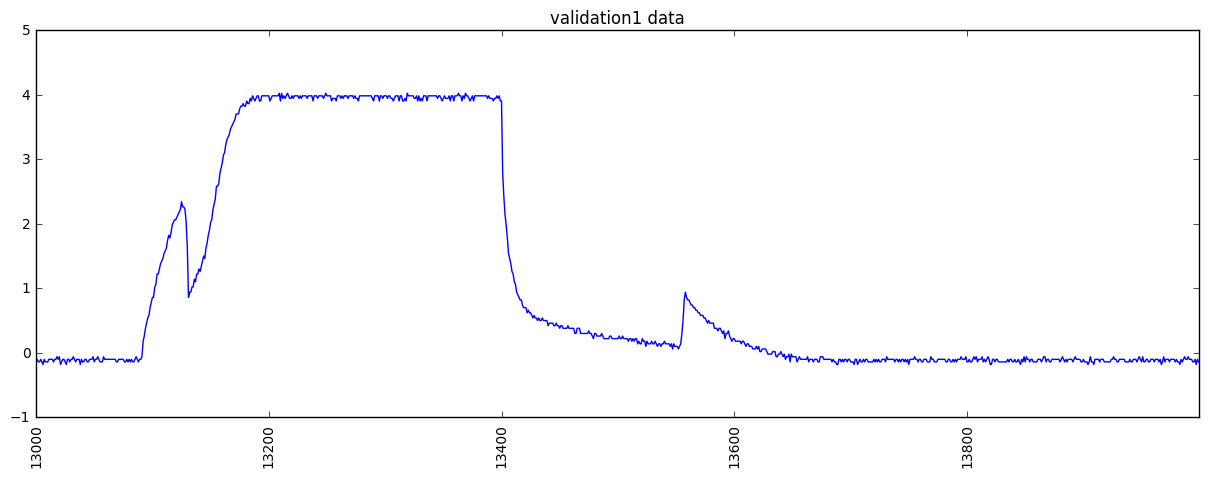

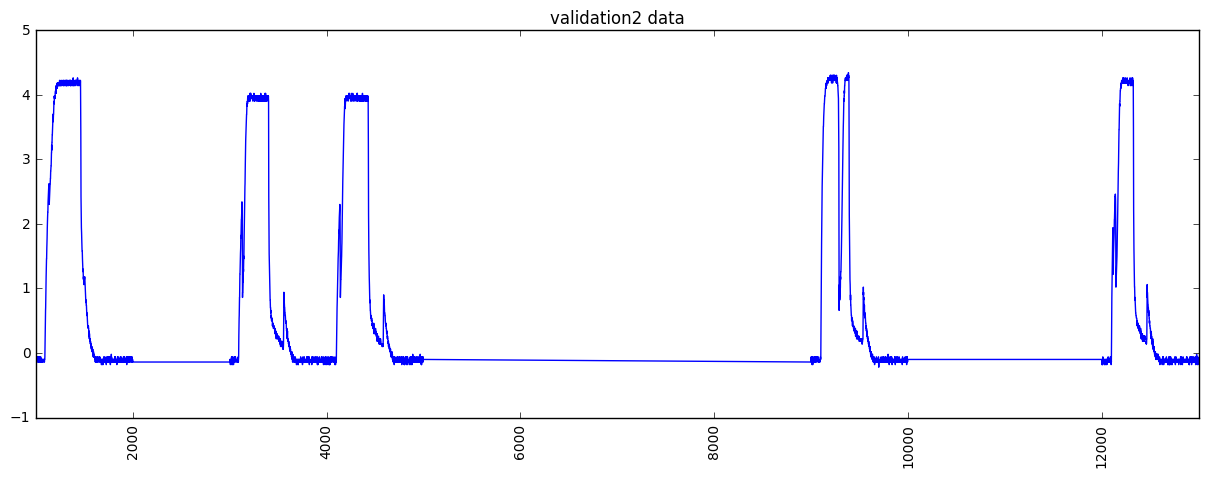

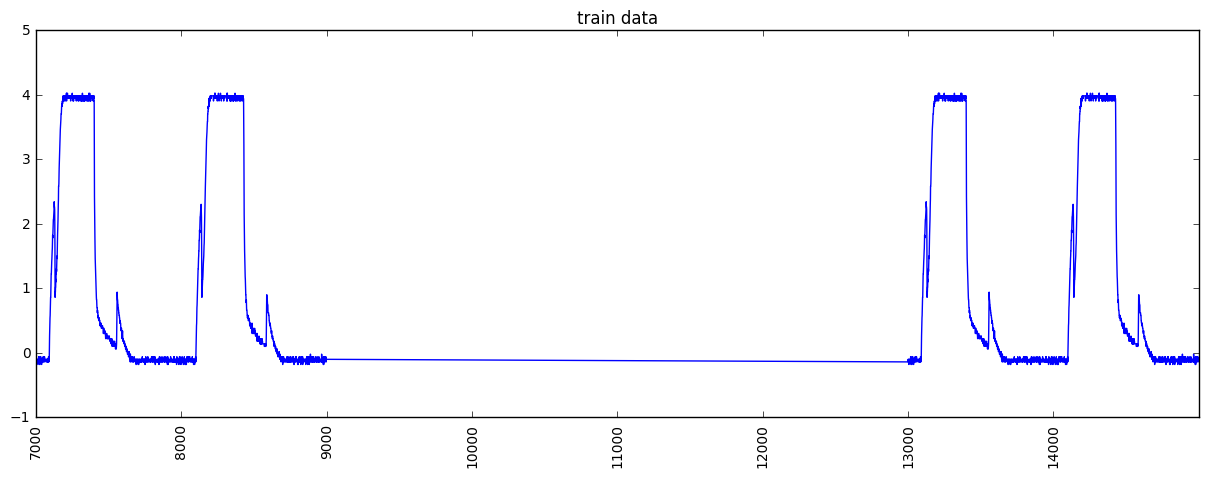

In [93]:
count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    df_tmp['value'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
#     for row in rows:
#         plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [94]:
for key in df_dict:
    np.save("../resources/data/discords/space_shuttle/%s"%(key),df_dict[key])

In [113]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [123]:
data_folder = "../resources/data/discords/space_shuttle/"

In [124]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(3760, 10)
(3760,)


In [125]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


(4700, 10)
(4700,)
(4940, 10, 1)
(4940, 10)


In [126]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(4700, 10)
(4700,)
(4940, 10)


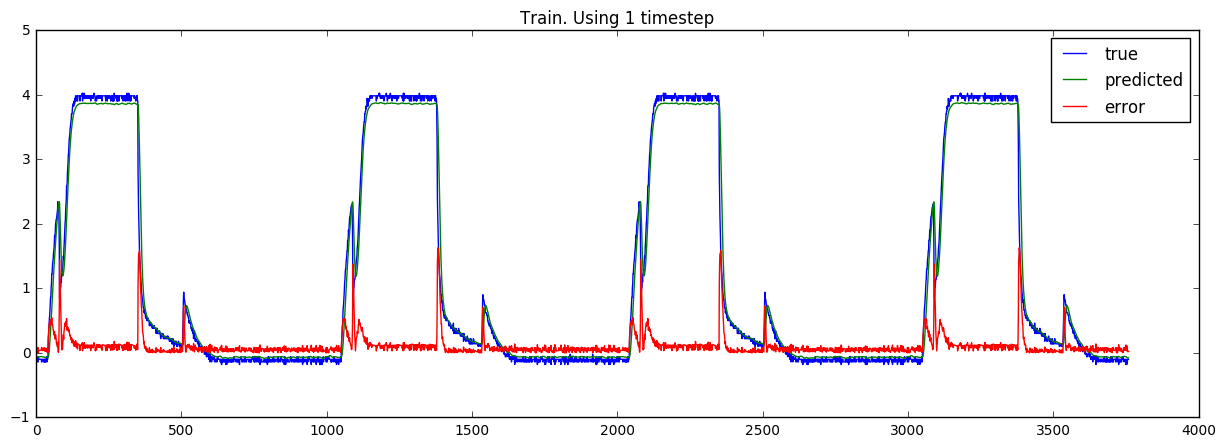

In [127]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[-0.0003593  -0.00036209 -0.00036586 -0.00037028 -0.00037481 -0.00037928
 -0.0003833  -0.00038605 -0.0003876  -0.00038715]
[[ 0.0460217   0.05205772  0.05750055  0.06231217  0.06650681  0.07011716
   0.07319599  0.07580177  0.07799096  0.0798116 ]
 [ 0.05205772  0.059269    0.06586912  0.07179131  0.07702807  0.08159817
   0.08554676  0.08893022  0.09180692  0.09422935]
 [ 0.05750055  0.06586912  0.0736445   0.08072399  0.08707132  0.09268354
   0.09759187  0.1018451   0.10549948  0.10860942]
 [ 0.06231217  0.07179131  0.08072399  0.08897874  0.09648336  0.10320615
   0.10915661  0.11436958  0.11889373  0.12278136]
 [ 0.06650681  0.07702807  0.08707132  0.09648336  0.10516325  0.11304333
   0.12010436  0.12635945  0.13184335  0.13660074]
 [ 0.07011716  0.08159817  0.09268354  0.10320615  0.11304333  0.12209868
   0.130317    0.13768265  0.14420867  0.14992581]
 [ 0.07319599  0.08554676  0.09759187  0.10915661  0.12010436  0.130317
   0.13971059  0.14823352  0.15587011  0.16262936]
 [ 0

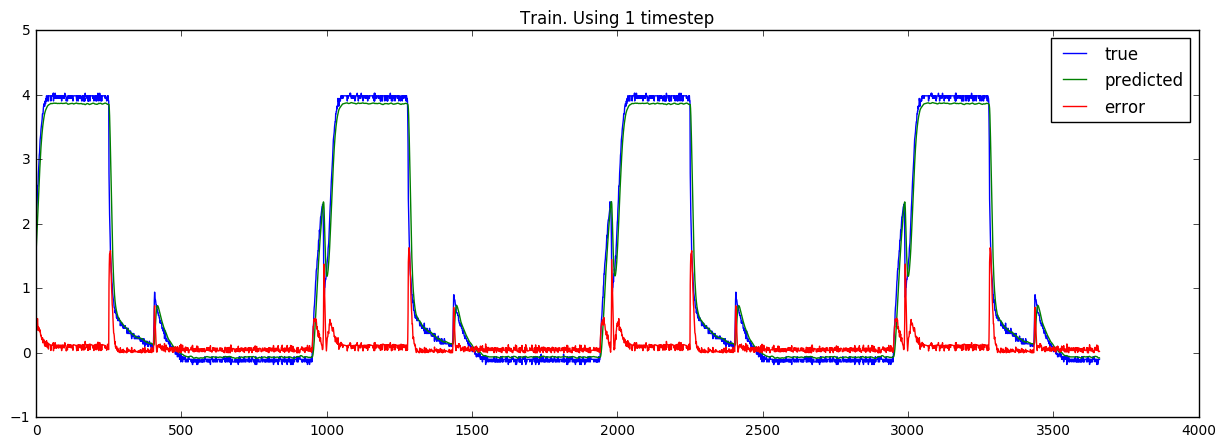

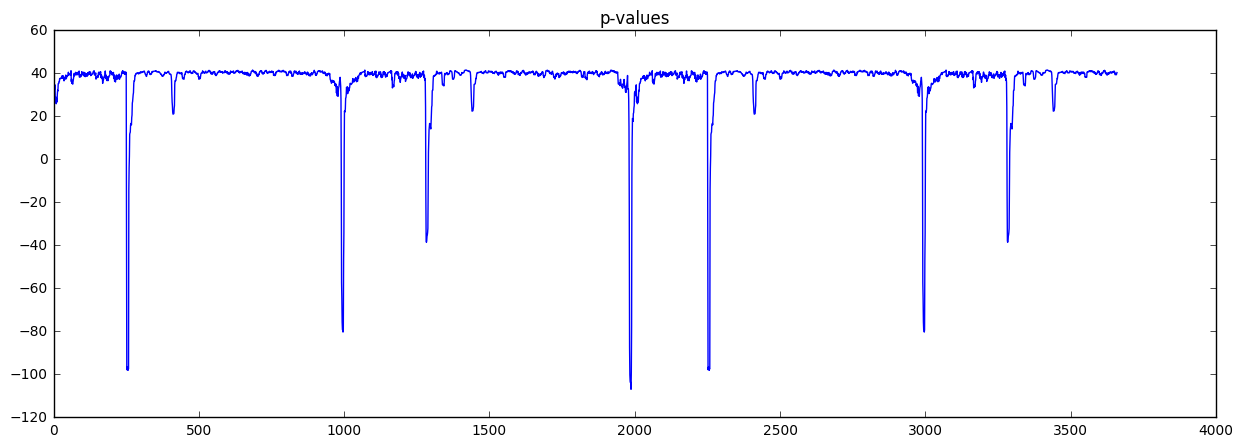

In [128]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print mean
print cov
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true[100:],label='true')
plt.plot(train_predictions[100:,0],label='predicted')
plt.plot(abs(train_true[100:] - train_predictions[100:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values[100:])
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [129]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
# v2_true_anomalies = np.where(validation2_labels[:,0]==1)
# print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
# print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
# print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
# v2_thresholds =v2_p_values[v2_true_anomalies]
# print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
#print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
#print "Test. Location of anomalies: %s"%(test_true_anomalies)
#print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
#test_thresholds = test_p_values[test_true_anomalies]
#print "Test. p-values at true anomalies: %s"%(test_thresholds)




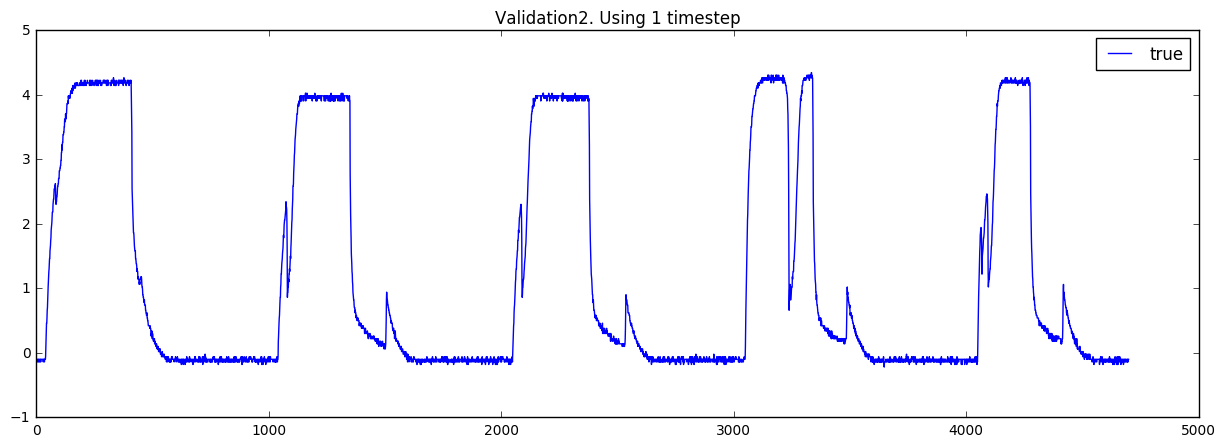

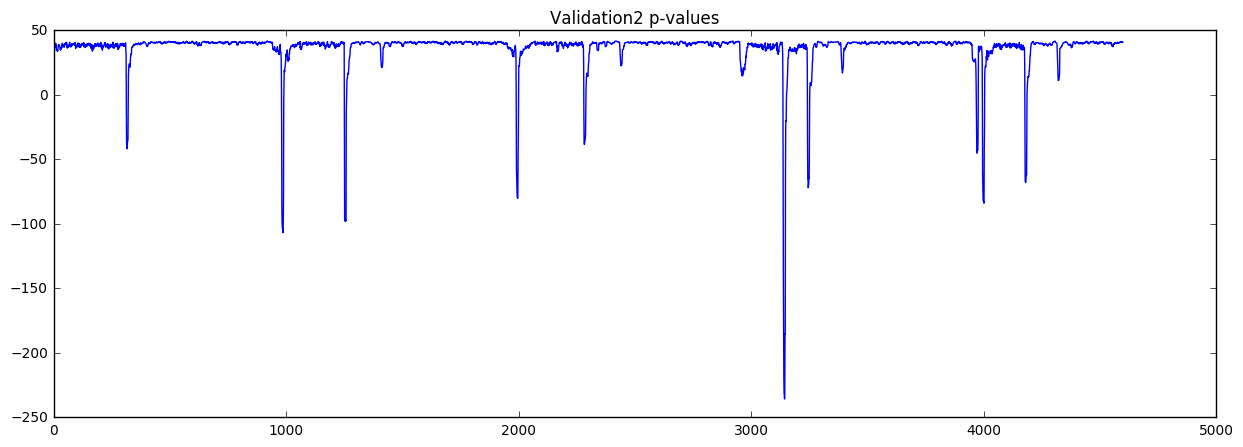

IndexError: index 49 is out of bounds for axis 1 with size 10

In [130]:
plt.figure(figsize=(15,5))
plt.plot(validation2_true,label='true')
# plt.plot(validation2_predictions[100:,49],label='predicted')
# plt.plot(abs(validation2_true - validation2_predictions[:,49]),label='error')
# for row in v2_true_anomalies:
#     plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Validation2. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(v2_p_values[100:])
plt.title("Validation2 p-values")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_true,label='true')
plt.plot(test_predictions[100:,49],label='predicted')
plt.plot(abs(test_true - test_predictions[:,49]),label='error')
# for row in test_true_anomalies:
#     plt.plot(row, test_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Test. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_p_values[100:])
plt.title("test p-values")
plt.show()


Candidate Thresholds: [-100]


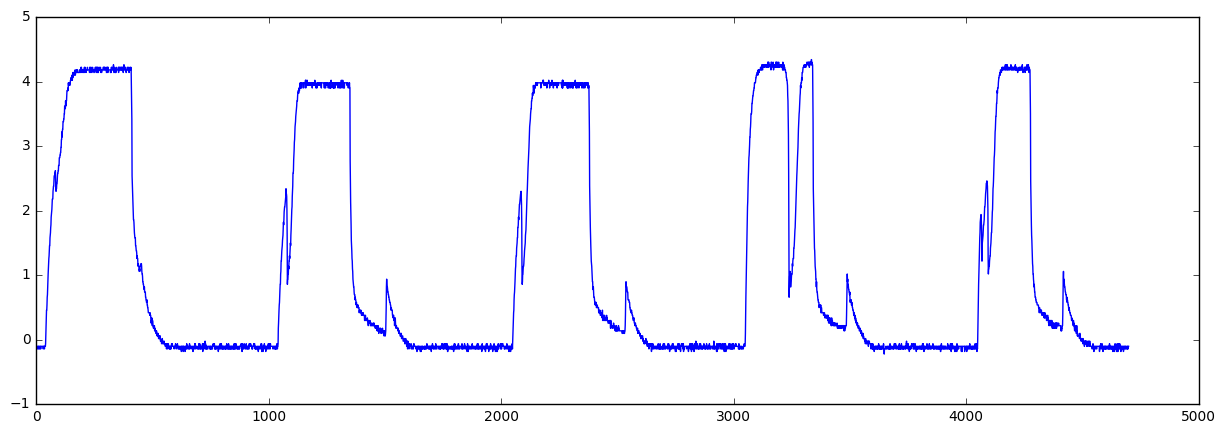

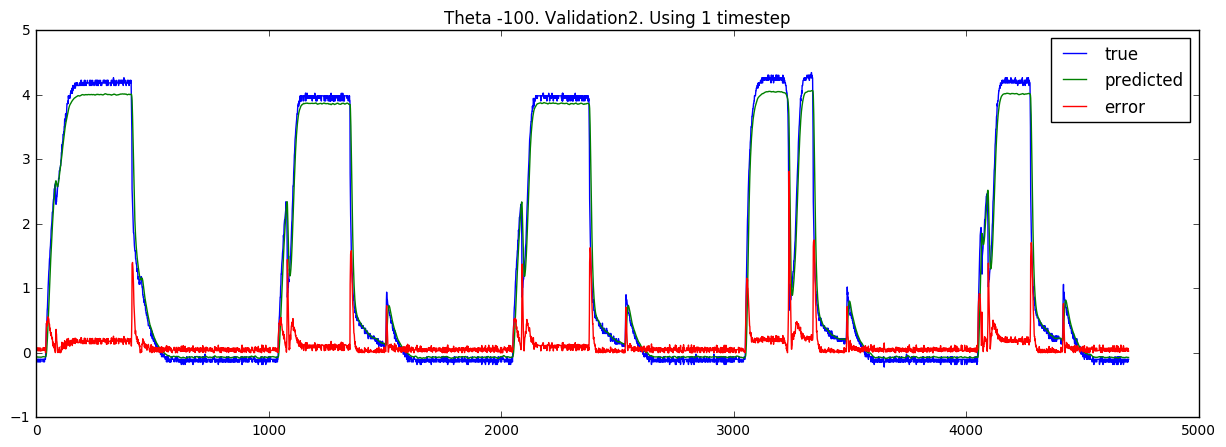

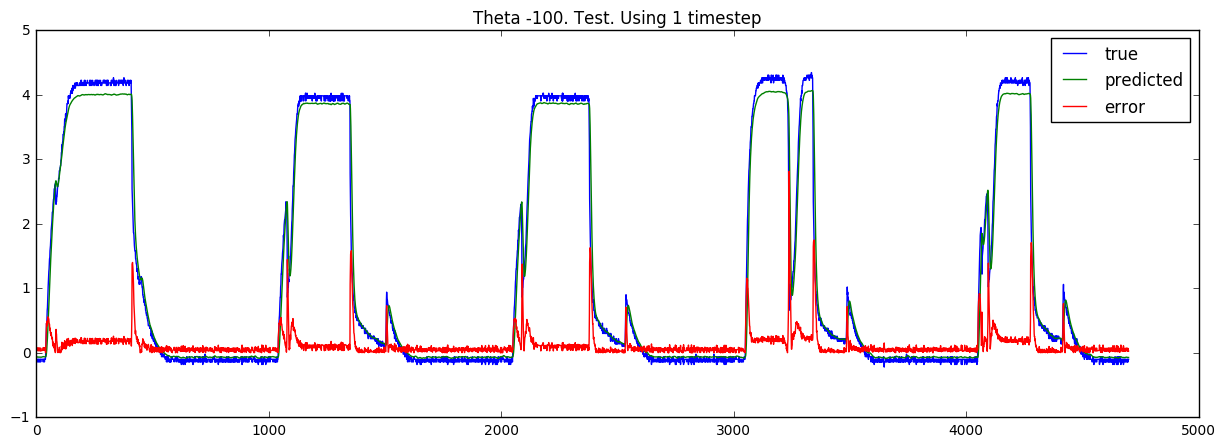

In [131]:
#thresholds = np.append(v2_thresholds,test_thresholds)

#thresholds =v2_thresholds
thresholds =[-100]
print
print "Candidate Thresholds: %s"%(thresholds)


for i in thresholds:
    theta= i
    test_potential_anomalies = np.where(test_p_values <= theta)
    v2_potential_anomalies = np.where(v2_p_values <= theta)
    plt.figure(figsize=(15,5))
    plt.plot(validation2_true,label='true')
    plt.plot(validation2_predictions[:,0],label='predicted')
    plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='error')
#     for row in v2_true_anomalies:
#         plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
#     for row in v2_potential_anomalies:
#         plt.plot(row, validation2_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Validation2. Using 1 timestep"%(i))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(test_true,label='true')
    plt.plot(test_predictions[:,0],label='predicted')
    plt.plot(abs(test_true - test_predictions[:,0]),label='error')
#     for row in test_true_anomalies:
#         plt.plot(row, test_true[row], 'r.', markersize=20.0)
#     for row in test_potential_anomalies:
#         plt.plot(row, test_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Test. Using 1 timestep"%(i))
    plt.show()
